<a href="https://colab.research.google.com/github/vivi08155/weboldal-website/blob/main/Application%20of%20data%20mining%20and%20machine%20learning%20methods%20in%20real%20estate%20market/szakdolgozat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Csatlakozás drivehoz**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

print("csatlakozott a driveomhoz")

Mounted at /content/drive
csatlakozott a driveomhoz


# **Importálások, beolvasás, db létrehozása**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #heatmap-hez

bereltossz = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/adatok/bereltjo2.csv", sep=";")
#print(bereltossz)
eladottossz = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/adatok/eladottjo2.csv", sep=";")
#print(eladottossz)


#berelt csv doksi DataFrameme alakitasa
df_bereltossz = pd.DataFrame(data = bereltossz, columns=['Település', 'Körzet', 'Év', 'Jogi_státusz', 'Nyaraló', 'Típus', 'Altípus','Panelprogram','Ingatlan_állapota', 'Építés_éve', 'Zárószint','Emelet','Tájolás','Kilátás','Lift', 'Lakáson_belüli_szintszám', 'Fűtés','Nettó_méret','Terasz_méret', 'Erkély_méret', 'Telek_méret', 'Telek_méret_mértékegysége', 'Szobaszám', 'Kiadási_ár', 'Négyzetméterár'])
df_bereltossz=df_bereltossz.fillna(0)


#eladott csv doksi DataFrameme alakitasa
df_eladottossz = pd.DataFrame(data = eladottossz, columns=['Település', 'Körzet', 'Év', 'Jogi_státusz', 'Nyaraló', 'Típus', 'Altípus','Panelprogram','Ingatlan_állapota', 'Építés_éve', 'Zárószint','Emelet','Tájolás','Kilátás','Lift', 'Lakáson_belüli_szintszám', 'Fűtés','Nettó_méret','Terasz_méret', 'Erkély_méret', 'Telek_méret', 'Telek_méret_mértékegysége', 'Szobaszám', 'Eladási_ár', 'Négyzetméterár'])
df_eladottossz=df_eladottossz.fillna(value=0)




# **Korrelációk vizsgálata:**

# **Bérbeadottak / Eladottak közül miket akarok vizsgálni**

In [ ]:
df_bereltossz.dtypes


Település                     object
Körzet                        object
Év                             int64
Jogi_státusz                  object
Nyaraló                        int64
Típus                         object
Altípus                       object
Panelprogram                   int64
Ingatlan_állapota              int64
Építés_éve                     int64
Zárószint                     object
Emelet                        object
Tájolás                       object
Kilátás                       object
Lift                           int64
Lakáson_belüli_szintszám       int64
Fűtés                         object
Nettó_méret                  float64
Terasz_méret                 float64
Erkély_méret                 float64
Telek_méret                  float64
Telek_méret_mértékegysége     object
Szobaszám                     object
Kiadási_ár                     int64
Négyzetméterár               float64
dtype: object

In [ ]:
#Település;Év;Jogi_státusz;Nyaraló;Típus;Altípus;Panelprogram;Ingatlan_állapota;Építés_éve;Zárószint;Emelet;Tájolás;Kilátás;Lift;
#Lakáson_belüli_szintszám;Fűtés;Nettó_méret;Terasz_méret;Erkély_méret;Telek_méret;Telek_méret_mértékegysége;Szobaszám;Kiadási_ár;Négyzetméterár																									
#Ötletek miket mivel: 
"""
Település - Év
Település - Típus
Település - Altípus
Település - Építés éve
Település - Fűtés
Település - Kiadási/Eladási ár
Település - Négyzetméterár
Csak eladottnál van értelme szerintem{
  Jogi - Panelprogram
  Jogi - Ingatlan állapota
  Jogi - Négyzetméterár
}
Típus - Altípus
Típus - Panelprogram
Típus - Építés éve
Típus - Lift
Típus - Fűtés
Típus - Nettó méret
Típus - Kiadási/Eladási ár
Típus - Négyzetméterár
Altípus - Kiadási/Eladási ár
Altípus - Négyzetméterár
Ingatlan állapota - Építési év
Ingatlna állapota - Fűtés
Ingatlan állapota - Nettó méret
Ingatlan állapota - Kiadási/Eladási ár
Ingatlan állapota - Négyzetméterár
Építés éve - Lift
Építés éve - Fűtés
Építés éve - Nettó méret
Építés éve - Szobaszám
Építés éve - Kiadási/Eladási ár
Építés éve - Négyzetméterár
Emelet - Lift
emelet - négyzetméter ár
emelet - Kiadási/Eladási ár
Nettó_méret - Kiadási/Eladási ár
"""

#Ezeken kívűl lesznek majd még szűrések is, külön városokra, típusokra stb


'\nTelepülés - Év\nTelepülés - Típus\nTelepülés - Altípus\nTelepülés - Építés éve\nTelepülés - Fűtés\nTelepülés - Kiadási/Eladási ár\nTelepülés - Négyzetméterár\nCsak eladottnál van értelme szerintem{\n  Jogi - Panelprogram\n  Jogi - Ingatlan állapota\n  Jogi - Négyzetméterár\n}\nTípus - Altípus\nTípus - Panelprogram\nTípus - Építés éve\nTípus - Lift\nTípus - Fűtés\nTípus - Nettó méret\nTípus - Kiadási/Eladási ár\nTípus - Négyzetméterár\nAltípus - Kiadási/Eladási ár\nAltípus - Négyzetméterár\nIngatlan állapota - Építési év\nIngatlna állapota - Fűtés\nIngatlan állapota - Nettó méret\nIngatlan állapota - Kiadási/Eladási ár\nIngatlan állapota - Négyzetméterár\nÉpítés éve - Lift\nÉpítés éve - Fűtés\nÉpítés éve - Nettó méret\nÉpítés éve - Szobaszám\nÉpítés éve - Kiadási/Eladási ár\nÉpítés éve - Négyzetméterár\nEmelet - Lift\nemelet - négyzetméter ár\nemelet - Kiadási/Eladási ár\nNettó_méret - Kiadási/Eladási ár\n'

# **Másolatok létrehozása, hogy ne az eredeti db-t módosítsam**

In [ ]:
#másolat az eredeti db-ről sima label encodinghoz
#df_masolat_eladott = df_eladottossz.select_dtypes(include=['object']).copy()
df_masolat_eladott = df_eladottossz.copy()
df_masolat_berelt = df_bereltossz.copy()

In [ ]:
#másolataz eredeti dbről a label top5höz
df_masolat_labeltop5_eladott = df_eladottossz.copy()
df_masolat_labeltop5_berelt = df_bereltossz.copy()

In [ ]:
#másolataz eredeti dbről a one hot top5höz
df_masolat_onehottop5_eladott = df_eladottossz.copy()
df_masolat_onehottop5_berelt = df_bereltossz.copy()

# **Kategórikus változókat lekérdezem külön, hogy lássam milyen típusaik vannak, és miből mennyi**

In [ ]:
#Település
df_masolat_eladott["Település"].value_counts()
df_masolat_berelt["Település"].value_counts()

Kecskemét         41
Debrecen          35
Győr              17
Miskolc           15
Pécs              13
Szeged            12
Szolnok           11
Székesfehérvár    10
Tatabánya          9
Szekszárd          6
Sopron             6
Zalaegerszeg       5
Nyíregyháza        5
Dunaújváros        4
Szombathely        3
Békéscsaba         3
Nagykanizsa        2
Veszprém           2
Érd                1
Name: Település, dtype: int64

In [ ]:
#Jogi státusz
df_masolat_eladott["Jogi_státusz"].value_counts()
df_masolat_berelt["Jogi_státusz"].value_counts()


hasznalt    191
uj            9
Name: Jogi_státusz, dtype: int64

In [ ]:
#Típus
df_masolat_eladott["Típus"].value_counts()
#df_masolat_berelt["Típus"].value_counts()

tarsashazi    375
csaladihaz    102
ikerhaz        11
sorhaz          6
tanya           4
hazresz         2
Name: Típus, dtype: int64

In [ ]:
#Altípus
df_masolat_eladott["Altípus"].value_counts()
#df_masolat_berelt["Altípus"].value_counts()

tegla                 316
panel                 133
csusztatott_zsalus     28
vegyesfalazatu         11
valyog                  5
konnyuszerkezetes       3
ko                      2
ytong                   1
egyeb                   1
Name: Altípus, dtype: int64

In [ ]:
#Emelet
df_masolat_eladott["Emelet"].value_counts()
#df_masolat_berelt["Emelet"].value_counts()

0                 125
3                  80
2                  67
1                  62
4                  47
földszint          45
magasföldszint     15
8                  14
5                  10
10                 10
6                   8
7                   7
9                   5
tetőtér             3
alagsor             2
Name: Emelet, dtype: int64

In [ ]:
#Fűtés
df_masolat_eladott["Fűtés"].value_counts()
#df_masolat_berelt["Fűtés"].value_counts()

gaz_cirko                  138
tavegyedi                  100
gaz_konvektor               97
tav                         69
hazkozponti                 29
hazkozponti_meresnelkul     14
faszen_kalyha               10
megujulo                     8
vegyes_kazan                 6
elektromos_infra             6
vegyes_cserepkalyha          5
egyeb                        4
vegyes_cirko                 4
gaz_cserepkalyha             3
gaz_kazan                    2
faszen_cirko                 2
vegyes_fancoil               1
elektromos_cirko             1
nincs                        1
Name: Fűtés, dtype: int64

In [ ]:
#Szobaszám
df_masolat_eladott["Szobaszám"].value_counts()
#df_masolat_berelt["Szobaszám"].value_counts()

2 + 0     168
3 + 0      71
1 + 0      54
2 + 1      47
1 + 1      45
4 + 0      32
1 + 2      30
2 + 2      14
3 + 1       9
5 + 0       6
1 + 3       6
6 + 0       4
4 + 1       2
3 + 3       2
2 + 3       2
3 + 2       2
5 + 1       1
6 + 2       1
11 + 0      1
6 + 1       1
5 + 3       1
7 + 0       1
Name: Szobaszám, dtype: int64

# **Label encoding mindre**

In [ ]:
#eladott
#objectből category típusra változtatom ami  kell
df_masolat_eladott["Település"] = df_masolat_eladott["Település"].astype('category')

df_masolat_eladott["Jogi_státusz"] = df_masolat_eladott["Jogi_státusz"].astype('category')

df_masolat_eladott["Típus"] = df_masolat_eladott["Típus"].astype('category')

df_masolat_eladott["Altípus"] = df_masolat_eladott["Altípus"].astype('category')

df_masolat_eladott["Emelet"] = df_masolat_eladott["Emelet"].astype('category')

df_masolat_eladott["Fűtés"] = df_masolat_eladott["Fűtés"].astype('category')

df_masolat_eladott["Szobaszám"] = df_masolat_eladott["Szobaszám"].astype('category')

df_masolat_eladott.dtypes

Település                    category
Körzet                         object
Év                              int64
Jogi_státusz                 category
Nyaraló                         int64
Típus                        category
Altípus                      category
Panelprogram                  float64
Ingatlan_állapota               int64
Építés_éve                      int64
Zárószint                      object
Emelet                       category
Tájolás                        object
Kilátás                        object
Lift                            int64
Lakáson_belüli_szintszám        int64
Fűtés                        category
Nettó_méret                   float64
Terasz_méret                  float64
Erkély_méret                  float64
Telek_méret                   float64
Telek_méret_mértékegysége      object
Szobaszám                    category
Eladási_ár                      int64
Négyzetméterár                float64
dtype: object

In [ ]:
#berelt
#objectből category típusra változtatom ami  kell
df_masolat_berelt["Település"] = df_masolat_berelt["Település"].astype('category')

df_masolat_berelt["Jogi_státusz"] = df_masolat_berelt["Jogi_státusz"].astype('category')

df_masolat_berelt["Típus"] = df_masolat_berelt["Típus"].astype('category')

df_masolat_berelt["Altípus"] = df_masolat_berelt["Altípus"].astype('category')

df_masolat_berelt["Emelet"] = df_masolat_berelt["Emelet"].astype('category')

df_masolat_berelt["Fűtés"] = df_masolat_berelt["Fűtés"].astype('category')

df_masolat_berelt["Szobaszám"] = df_masolat_berelt["Szobaszám"].astype('category')

df_masolat_berelt.dtypes

Település                    category
Körzet                         object
Év                              int64
Jogi_státusz                 category
Nyaraló                         int64
Típus                        category
Altípus                      category
Panelprogram                    int64
Ingatlan_állapota               int64
Építés_éve                      int64
Zárószint                      object
Emelet                       category
Tájolás                        object
Kilátás                        object
Lift                            int64
Lakáson_belüli_szintszám        int64
Fűtés                        category
Nettó_méret                   float64
Terasz_méret                  float64
Erkély_méret                  float64
Telek_méret                   float64
Telek_méret_mértékegysége      object
Szobaszám                    category
Kiadási_ár                      int64
Négyzetméterár                float64
dtype: object

In [ ]:
#hozzáadom az db-hez az új oszlopokat
df_masolat_eladott["Település_kategória"] = df_masolat_eladott["Település"].cat.codes
df_masolat_eladott["Jogi_státusz_kategória"] = df_masolat_eladott["Jogi_státusz"].cat.codes
df_masolat_eladott["Típus_kategória"] = df_masolat_eladott["Típus"].cat.codes
df_masolat_eladott["Altípus_kategória"] = df_masolat_eladott["Altípus"].cat.codes
df_masolat_eladott["Emelet_kategória"] = df_masolat_eladott["Emelet"].cat.codes
df_masolat_eladott["Fűtés_kategória"] = df_masolat_eladott["Fűtés"].cat.codes
df_masolat_eladott["Szobaszám_kategória"] = df_masolat_eladott["Szobaszám"].cat.codes

df_masolat_eladott.head()

,Település,Körzet,Év,Jogi_státusz,Nyaraló,Típus,Altípus,Panelprogram,Ingatlan_állapota,Építés_éve,...,Szobaszám,Eladási_ár,Négyzetméterár,Település_kategória,Jogi_státusz_kategória,Típus_kategória,Altípus_kategória,Emelet_kategória,Fűtés_kategória,Szobaszám_kategória
0,Békéscsaba,II. kerület,2018,hasznalt,0,tarsashazi,tegla,0.0,5,1995,...,1 + 2,13200000,206250.00,0,0,5,5,5,5,2
1,Szolnok,Szolnok,2018,hasznalt,0,tarsashazi,panel,0.0,4,1960,...,1 + 1,7700000,202631.58,16,0,5,4,4,14,1
2,Miskolc,Avas II.,2018,hasznalt,0,tarsashazi,panel,0.0,2,1976,...,1 + 2,6180000,112363.64,8,0,5,4,5,13,2
3,Debrecen,Belváros,2018,hasznalt,0,tarsashazi,tegla,0.0,2,1972,...,1 + 1,12300000,267391.30,1,0,5,5,5,14,1
4,Tatabánya,Kertváros,2018,hasznalt,0,csaladihaz,tegla,0.0,4,2001,...,5 + 3,21000000,81395.35,19,0,0,5,0,4,17


In [ ]:
#hozzáadom az db-hez az új oszlopokat
df_masolat_berelt["Település_kategória"] = df_masolat_berelt["Település"].cat.codes
df_masolat_berelt["Jogi_státusz_kategória"] = df_masolat_berelt["Jogi_státusz"].cat.codes
df_masolat_berelt["Típus_kategória"] = df_masolat_berelt["Típus"].cat.codes
df_masolat_berelt["Altípus_kategória"] = df_masolat_berelt["Altípus"].cat.codes
df_masolat_berelt["Emelet_kategória"] = df_masolat_berelt["Emelet"].cat.codes
df_masolat_berelt["Fűtés_kategória"] = df_masolat_berelt["Fűtés"].cat.codes
df_masolat_berelt["Szobaszám_kategória"] = df_masolat_berelt["Szobaszám"].cat.codes

df_masolat_berelt.head()

,Település,Körzet,Év,Jogi_státusz,Nyaraló,Típus,Altípus,Panelprogram,Ingatlan_állapota,Építés_éve,...,Szobaszám,Kiadási_ár,Négyzetméterár,Település_kategória,Jogi_státusz_kategória,Típus_kategória,Altípus_kategória,Emelet_kategória,Fűtés_kategória,Szobaszám_kategória
0,Székesfehérvár,Belváros,2018,hasznalt,0,tarsashazi,tegla,0,4,1973,...,2 + 0,100000,1828.15,14,0,4,3,1,5,4
1,Szolnok,Belváros,2018,hasznalt,0,tarsashazi,tegla,0,5,1965,...,2 + 0,90000,1764.71,12,0,4,3,1,6,4
2,Debrecen,Széchenyi-kert,2018,hasznalt,0,sorhaz,tegla,0,5,2006,...,4 + 0,300000,2380.95,1,0,3,3,0,4,10
3,Dunaújváros,Római városrész,2018,hasznalt,0,tarsashazi,panel,0,3,1970,...,2 + 0,60000,1153.85,2,0,4,2,3,7,4
4,Kecskemét,Széchenyiváros,2018,hasznalt,0,tarsashazi,tegla,0,4,1970,...,2 + 0,63000,1211.54,4,0,4,3,11,6,4


# **Label encoding a top 5-re verzió**

In [ ]:
#eladott
#objectből category típusra változtatom ami  kell
df_masolat_labeltop5_eladott["Település"] = df_masolat_labeltop5_eladott["Település"].astype('category')

df_masolat_labeltop5_eladott["Jogi_státusz"] = df_masolat_labeltop5_eladott["Jogi_státusz"].astype('category')

df_masolat_labeltop5_eladott["Típus"] = df_masolat_labeltop5_eladott["Típus"].astype('category')

df_masolat_labeltop5_eladott["Altípus"] = df_masolat_labeltop5_eladott["Altípus"].astype('category')

df_masolat_labeltop5_eladott["Emelet"] = df_masolat_labeltop5_eladott["Emelet"].astype('category')

df_masolat_labeltop5_eladott["Fűtés"] = df_masolat_labeltop5_eladott["Fűtés"].astype('category')

df_masolat_labeltop5_eladott["Szobaszám"] = df_masolat_labeltop5_eladott["Szobaszám"].astype('category')

df_masolat_labeltop5_eladott.dtypes

Település                    category
Körzet                         object
Év                              int64
Jogi_státusz                 category
Nyaraló                         int64
Típus                        category
Altípus                      category
Panelprogram                  float64
Ingatlan_állapota               int64
Építés_éve                      int64
Zárószint                      object
Emelet                       category
Tájolás                        object
Kilátás                        object
Lift                            int64
Lakáson_belüli_szintszám        int64
Fűtés                        category
Nettó_méret                   float64
Terasz_méret                  float64
Erkély_méret                  float64
Telek_méret                   float64
Telek_méret_mértékegysége      object
Szobaszám                    category
Eladási_ár                      int64
Négyzetméterár                float64
dtype: object

In [ ]:
#berelt
#objectből category típusra változtatom ami  kell
df_masolat_labeltop5_berelt["Település"] = df_masolat_labeltop5_berelt["Település"].astype('category')

df_masolat_labeltop5_berelt["Jogi_státusz"] = df_masolat_labeltop5_berelt["Jogi_státusz"].astype('category')

df_masolat_labeltop5_berelt["Típus"] = df_masolat_labeltop5_berelt["Típus"].astype('category')

df_masolat_labeltop5_berelt["Altípus"] = df_masolat_labeltop5_berelt["Altípus"].astype('category')

df_masolat_labeltop5_berelt["Emelet"] = df_masolat_labeltop5_berelt["Emelet"].astype('category')

df_masolat_labeltop5_berelt["Fűtés"] = df_masolat_labeltop5_berelt["Fűtés"].astype('category')

df_masolat_labeltop5_berelt["Szobaszám"] = df_masolat_labeltop5_berelt["Szobaszám"].astype('category')

df_masolat_labeltop5_berelt.dtypes

Település                    category
Körzet                         object
Év                              int64
Jogi_státusz                 category
Nyaraló                         int64
Típus                        category
Altípus                      category
Panelprogram                    int64
Ingatlan_állapota               int64
Építés_éve                      int64
Zárószint                      object
Emelet                       category
Tájolás                        object
Kilátás                        object
Lift                            int64
Lakáson_belüli_szintszám        int64
Fűtés                        category
Nettó_méret                   float64
Terasz_méret                  float64
Erkély_méret                  float64
Telek_méret                   float64
Telek_méret_mértékegysége      object
Szobaszám                    category
Kiadási_ár                      int64
Négyzetméterár                float64
dtype: object

In [ ]:
#hozzáadom az db-hez az új oszlopokat
df_masolat_labeltop5_eladott["Település_kategória"] = df_masolat_labeltop5_eladott["Település"].cat.codes
df_masolat_labeltop5_eladott["Jogi_státusz_kategória"] = df_masolat_labeltop5_eladott["Jogi_státusz"].cat.codes
df_masolat_labeltop5_eladott["Típus_kategória"] = df_masolat_labeltop5_eladott["Típus"].cat.codes
df_masolat_labeltop5_eladott["Altípus_kategória"] = df_masolat_labeltop5_eladott["Altípus"].cat.codes
df_masolat_labeltop5_eladott["Emelet_kategória"] = df_masolat_labeltop5_eladott["Emelet"].cat.codes
df_masolat_labeltop5_eladott["Fűtés_kategória"] = df_masolat_labeltop5_eladott["Fűtés"].cat.codes
df_masolat_labeltop5_eladott["Szobaszám_kategória"] = df_masolat_labeltop5_eladott["Szobaszám"].cat.codes

df_masolat_labeltop5_eladott.head()

,Település,Körzet,Év,Jogi_státusz,Nyaraló,Típus,Altípus,Panelprogram,Ingatlan_állapota,Építés_éve,...,Szobaszám,Eladási_ár,Négyzetméterár,Település_kategória,Jogi_státusz_kategória,Típus_kategória,Altípus_kategória,Emelet_kategória,Fűtés_kategória,Szobaszám_kategória
0,Békéscsaba,II. kerület,2018,hasznalt,0,tarsashazi,tegla,0.0,5,1995,...,1 + 2,13200000,206250.00,0,0,5,5,5,5,2
1,Szolnok,Szolnok,2018,hasznalt,0,tarsashazi,panel,0.0,4,1960,...,1 + 1,7700000,202631.58,16,0,5,4,4,14,1
2,Miskolc,Avas II.,2018,hasznalt,0,tarsashazi,panel,0.0,2,1976,...,1 + 2,6180000,112363.64,8,0,5,4,5,13,2
3,Debrecen,Belváros,2018,hasznalt,0,tarsashazi,tegla,0.0,2,1972,...,1 + 1,12300000,267391.30,1,0,5,5,5,14,1
4,Tatabánya,Kertváros,2018,hasznalt,0,csaladihaz,tegla,0.0,4,2001,...,5 + 3,21000000,81395.35,19,0,0,5,0,4,17


In [ ]:
#hozzáadom az db-hez az új oszlopokat
df_masolat_labeltop5_berelt["Település_kategória"] = df_masolat_labeltop5_berelt["Település"].cat.codes
df_masolat_labeltop5_berelt["Jogi_státusz_kategória"] = df_masolat_labeltop5_berelt["Jogi_státusz"].cat.codes
df_masolat_labeltop5_berelt["Típus_kategória"] = df_masolat_labeltop5_berelt["Típus"].cat.codes
df_masolat_labeltop5_berelt["Altípus_kategória"] = df_masolat_labeltop5_berelt["Altípus"].cat.codes
df_masolat_labeltop5_berelt["Emelet_kategória"] = df_masolat_labeltop5_berelt["Emelet"].cat.codes
df_masolat_labeltop5_berelt["Fűtés_kategória"] = df_masolat_labeltop5_berelt["Fűtés"].cat.codes
df_masolat_labeltop5_berelt["Szobaszám_kategória"] = df_masolat_labeltop5_berelt["Szobaszám"].cat.codes

df_masolat_labeltop5_berelt.head()

,Település,Körzet,Év,Jogi_státusz,Nyaraló,Típus,Altípus,Panelprogram,Ingatlan_állapota,Építés_éve,...,Szobaszám,Kiadási_ár,Négyzetméterár,Település_kategória,Jogi_státusz_kategória,Típus_kategória,Altípus_kategória,Emelet_kategória,Fűtés_kategória,Szobaszám_kategória
0,Székesfehérvár,Belváros,2018,hasznalt,0,tarsashazi,tegla,0,4,1973,...,2 + 0,100000,1828.15,14,0,4,3,1,5,4
1,Szolnok,Belváros,2018,hasznalt,0,tarsashazi,tegla,0,5,1965,...,2 + 0,90000,1764.71,12,0,4,3,1,6,4
2,Debrecen,Széchenyi-kert,2018,hasznalt,0,sorhaz,tegla,0,5,2006,...,4 + 0,300000,2380.95,1,0,3,3,0,4,10
3,Dunaújváros,Római városrész,2018,hasznalt,0,tarsashazi,panel,0,3,1970,...,2 + 0,60000,1153.85,2,0,4,2,3,7,4
4,Kecskemét,Széchenyiváros,2018,hasznalt,0,tarsashazi,tegla,0,4,1970,...,2 + 0,63000,1211.54,4,0,4,3,11,6,4


# **One hot encoding top5**

In [ ]:
#bereltre
#itt nem kell a category típússá alakítani, csak az oszlopokat felsorolni, ebben segít a get_dummies beépített fgv, a sima dummies-szal nem volt jó
categorical_columns = ['Település', 'Jogi_státusz', 'Típus', 'Altípus', 'Emelet', 'Fűtés', 'Szobaszám']
for column in categorical_columns:
    tempdf = pd.get_dummies(df_masolat_onehottop5_berelt[column], prefix=column)
    df_masolat_onehottop5_berelt = pd.merge(
        left=df_masolat_onehottop5_berelt,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df_masolat_onehottop5_berelt = df_masolat_onehottop5_berelt.drop(columns=column)
print(df_masolat_onehottop5_berelt)


              Körzet    Év  Nyaraló  Panelprogram  Ingatlan_állapota  \
0           Belváros  2018        0             0                  4   
1           Belváros  2018        0             0                  5   
2     Széchenyi-kert  2018        0             0                  5   
3    Római városrész  2018        0             0                  3   
4     Széchenyiváros  2018        0             0                  4   
..               ...   ...      ...           ...                ...   
195       Máriaváros  2020        0             0                  5   
196        Sestakert  2020        0             1                  4   
197  Cseri lakótelep  2020        0             0                  4   
198   Széchenyiváros  2020        0             0                  4   
199          Szolnok  2020        0             0                  4   

     Építés_éve    Zárószint Tájolás Kilátás  Lift  ...  Szobaszám_2 + 1  \
0          1973            0      NY   utcai     0  ...    

In [ ]:
#eladottra
categorical_columns = ['Település', 'Jogi_státusz', 'Típus', 'Altípus', 'Emelet', 'Fűtés', 'Szobaszám']
for column in categorical_columns:
    tempdf = pd.get_dummies(df_masolat_onehottop5_eladott[column], prefix=column)
    df_masolat_onehottop5_eladott = pd.merge(
        left=df_masolat_onehottop5_eladott,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df_masolat_onehottop5_eladott = df_masolat_onehottop5_eladott.drop(columns=column)
print(df_masolat_onehottop5_eladott)

               Körzet    Év  Nyaraló  Panelprogram  Ingatlan_állapota  \
0         II. kerület  2018        0           0.0                  5   
1             Szolnok  2018        0           0.0                  4   
2            Avas II.  2018        0           0.0                  2   
3            Belváros  2018        0           0.0                  2   
4           Kertváros  2018        0           0.0                  4   
..                ...   ...      ...           ...                ...   
495            Érkert  2020        0           0.0                  3   
496         Szekszárd  2020        0           0.0                  2   
497          Belváros  2020        0           0.0                  5   
498  Keleti Városrész  2020        0           0.0                  4   
499          Belváros  2020        0           0.0                  4   

     Építés_éve Zárószint Tájolás      Kilátás  Lift  ...  Szobaszám_3 + 3  \
0          1995         4       K        utca

# **Korreláció sima label encodinggal**

**Bérbeadott:**

In [ ]:
df_masolat_berelt.corr()
df_masolat_berelt

,Település,Körzet,Év,Jogi_státusz,Nyaraló,Típus,Altípus,Panelprogram,Ingatlan_állapota,Építés_éve,Zárószint,Emelet,Tájolás,Kilátás,Lift,Lakáson_belüli_szintszám,Fűtés,Nettó_méret,Terasz_méret,Erkély_méret,Telek_méret,Telek_méret_mértékegysége,Szobaszám,Kiadási_ár,Négyzetméterár,Település_kategória,Jogi_státusz_kategória,Típus_kategória,Altípus_kategória,Emelet_kategória,Fűtés_kategória,Szobaszám_kategória
0,Székesfehérvár,Belváros,2018,hasznalt,0,tarsashazi,tegla,0,4,1973,0,1,NY,utcai,0,1,gaz_kazan,54.7,0.0,4.5,0.0,nm,2 + 0,100000,1828.15,14,0,4,3,1,5,4
1,Szolnok,Belváros,2018,hasznalt,0,tarsashazi,tegla,0,5,1965,3,1,NY,utcai,0,0,gaz_konvektor,51.0,0.0,1.5,0.0,nm,2 + 0,90000,1764.71,12,0,4,3,1,6,4
2,Debrecen,Széchenyi-kert,2018,hasznalt,0,sorhaz,tegla,0,5,2006,0,0,NY,0,0,1,gaz_cirko,126.0,16.6,1.8,120.0,nm,4 + 0,300000,2380.95,1,0,3,3,0,4,10
3,Dunaújváros,Római városrész,2018,hasznalt,0,tarsashazi,panel,0,3,1970,4,2,K,utcai,0,0,hazkozponti,52.0,0.0,3.0,0.0,nm,2 + 0,60000,1153.85,2,0,4,2,3,7,4
4,Kecskemét,Széchenyiváros,2018,hasznalt,0,tarsashazi,tegla,0,4,1970,4,földszint,D,utcai,0,1,gaz_konvektor,52.0,0.0,0.0,0.0,nm,2 + 0,63000,1211.54,4,0,4,3,11,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Kecskemét,Máriaváros,2020,hasznalt,0,tarsashazi,tegla,0,5,2006,3,3,D,utcai,1,1,hazkozponti,44.0,0.0,0.0,0.0,0,2 + 0,85000,1931.82,4,0,4,3,4,7,4
196,Debrecen,Sestakert,2020,hasznalt,0,tarsashazi,panel,1,4,1985,10,7,K,utcai,1,0,tavegyedi,30.0,0.0,3.0,0.0,0,1 + 0,75000,2500.00,1,0,4,2,8,10,0
197,Tatabánya,Cseri lakótelep,2020,hasznalt,0,tarsashazi,tegla,0,4,1960,4,3,D,utcai,0,0,tav,56.0,0.0,4.0,0.0,0,2 + 0,90000,1607.14,15,0,4,3,4,9,4
198,Kecskemét,Széchenyiváros,2020,hasznalt,0,tarsashazi,tegla,0,4,1978,4,4,DNY,utcai,0,1,gaz_konvektor,27.0,0.0,0.0,0.0,0,1 + 0,55000,2037.04,4,0,4,3,5,6,0


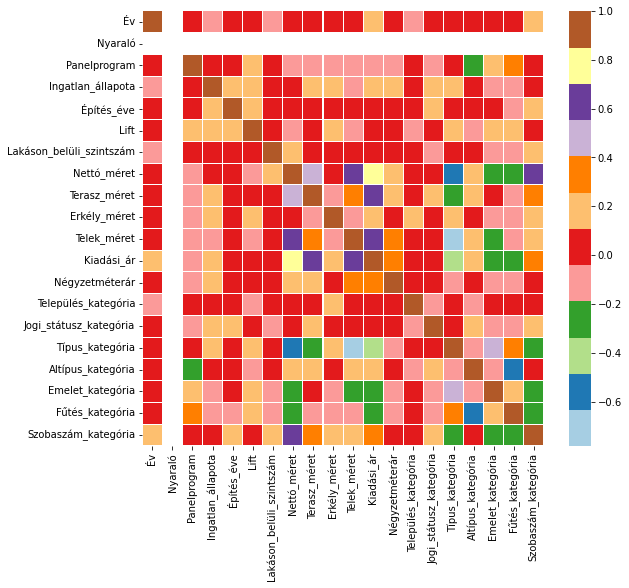

In [ ]:
corrmat = df_masolat_berelt.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="Paired", linewidths = 0.1)

**Eladott:**

In [ ]:
df_masolat_eladott.corr()

,Év,Nyaraló,Panelprogram,Ingatlan_állapota,Építés_éve,Lift,Lakáson_belüli_szintszám,Nettó_méret,Terasz_méret,Erkély_méret,Telek_méret,Eladási_ár,Négyzetméterár,Település_kategória,Jogi_státusz_kategória,Típus_kategória,Altípus_kategória,Emelet_kategória,Fűtés_kategória,Szobaszám_kategória
Év,1.000000,-0.036698,0.111050,-0.040934,0.006040,-0.018494,0.084820,-0.029283,0.051589,-0.059259,0.054180,0.138432,0.212740,0.119658,0.007217,-0.011302,-0.046878,0.006121,0.011439,0.167765
Nyaraló,-0.036698,1.000000,-0.022598,-0.088778,-0.015788,-0.042222,-0.069710,-0.066747,0.009811,-0.045231,0.087592,-0.098062,-0.112511,0.050094,-0.021641,-0.147762,-0.009115,-0.077311,-0.030726,-0.095961
Panelprogram,0.111050,-0.022598,1.000000,0.054555,-0.016752,0.197459,0.039099,-0.115030,-0.108241,0.040342,-0.114229,-0.055202,0.057039,-0.034806,-0.081017,0.162260,-0.110637,0.112477,0.304897,-0.024441
Ingatlan_állapota,-0.040934,-0.088778,0.054555,1.000000,0.476443,0.168516,-0.008333,0.012251,0.076652,0.109097,-0.174890,0.377819,0.493190,-0.142530,0.322422,0.224204,-0.053054,0.060107,-0.069939,0.054808
Építés_éve,0.006040,-0.015788,-0.016752,0.476443,1.000000,0.130277,0.059300,0.201058,0.250409,0.151811,-0.070986,0.454711,0.396679,-0.073081,0.515331,0.065870,-0.008579,-0.011947,-0.195355,0.214850
Lift,-0.018494,-0.042222,0.197459,0.168516,0.130277,1.000000,-0.084816,-0.157819,-0.119867,0.202726,-0.213428,-0.024160,0.150999,-0.134361,0.180586,0.303172,-0.251862,0.207215,0.308728,-0.080942
Lakáson_belüli_szintszám,0.084820,-0.069710,0.039099,-0.008333,0.059300,-0.084816,1.000000,0.171544,0.076065,0.003484,0.010794,0.110025,-0.026030,0.092367,-0.032003,-0.006172,-0.017419,-0.060823,-0.063232,0.154524
Nettó_méret,-0.029283,-0.066747,-0.115030,0.012251,0.201058,-0.157819,0.171544,1.000000,0.422405,0.033308,0.326239,0.631802,-0.155878,0.025524,0.026252,-0.490993,0.100855,-0.314041,-0.270489,0.670906
Terasz_méret,0.051589,0.009811,-0.108241,0.076652,0.250409,-0.119867,0.076065,0.422405,1.000000,-0.182977,0.228591,0.398857,0.048996,0.035777,0.197919,-0.314580,0.117586,-0.129649,-0.254924,0.281552
Erkély_méret,-0.059259,-0.045231,0.040342,0.109097,0.151811,0.202726,0.003484,0.033308,-0.182977,1.000000,-0.165354,0.087157,0.092181,-0.033685,0.149202,0.225432,-0.085863,-0.000660,0.096422,0.121953


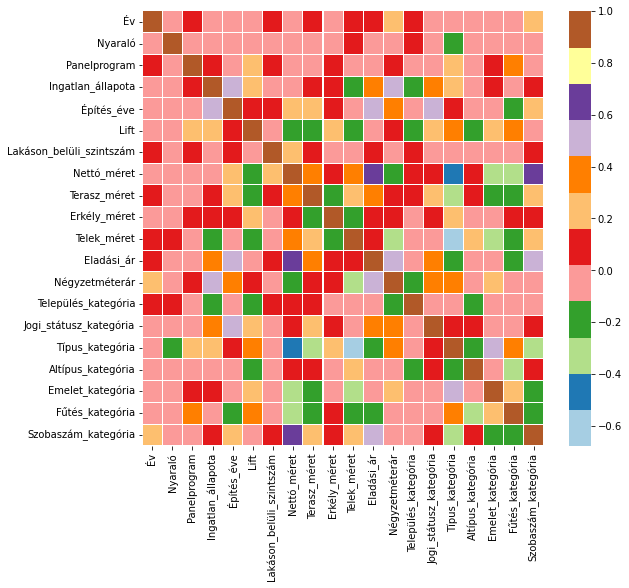

In [ ]:
corrmat = df_masolat_eladott.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="Paired", linewidths = 0.1)

# **Korreláció top5-ös label encoding-gal**

A Jogi státusz, a Típus és az Altípust nem kell változtatni, alapból 5 vagy kevesebb fajtája van.

**Bérbeadott:**

In [ ]:
#először kigyűjtöttem a top5öket amikket szűrnöm kell, majd egy új adatbázisba lementettem
"""
település:
Kecskemét         41
Debrecen          35
Győr              17
Miskolc           15
Pécs              13
emelet:
2                 41
1                 35
3                 28
földszint         26
0                 23
fűtés:
gaz_cirko                  68
gaz_konvektor              40
tavegyedi                  40
tav                        25
hazkozponti                14
szobaszám:
2 + 0     89
1 + 0     33
3 + 0     27
1 + 1     18
2 + 1     10
"""
df_masolat_labeltop5_KESZ_berelt = df_masolat_labeltop5_berelt[((df_masolat_labeltop5_berelt.Település == "Kecskemét") | (df_masolat_labeltop5_berelt.Település == "Debrecen") | (df_masolat_labeltop5_berelt.Település == "Győr") | (df_masolat_labeltop5_berelt.Település == "Miskolc") | (df_masolat_labeltop5_berelt.Település == "Pécs")) & ((df_masolat_labeltop5_berelt.Emelet == "2") | (df_masolat_labeltop5_berelt.Emelet == "1") | (df_masolat_labeltop5_berelt.Emelet == "3") | (df_masolat_labeltop5_berelt.Emelet == "földszint") | (df_masolat_labeltop5_berelt.Emelet == "0")) & ((df_masolat_labeltop5_berelt.Fűtés == "gaz_cirko") | (df_masolat_labeltop5_berelt.Fűtés == "gaz_konvektor") | (df_masolat_labeltop5_berelt.Fűtés == "tavegyedi") | (df_masolat_labeltop5_berelt.Fűtés == "tav") | (df_masolat_labeltop5_berelt.Fűtés == "hazkozponti")) & ((df_masolat_labeltop5_berelt.Szobaszám == "2 + 0") | (df_masolat_labeltop5_berelt.Szobaszám == "1 + 0") | (df_masolat_labeltop5_berelt.Szobaszám == "3 + 0") | (df_masolat_labeltop5_berelt.Szobaszám == "1 + 1") | (df_masolat_labeltop5_berelt.Szobaszám == "2 + 1"))]
#& (df_masolat_labeltop5_berelt.Emelet_kategória > 5) & (df_masolat_labeltop5_berelt.Fűtés_kategória > 5) & (df_masolat_labeltop5_berelt.Szobaszám_kategória > 5)]
print(df_masolat_labeltop5_KESZ_berelt)

     Település             Körzet    Év Jogi_státusz  Nyaraló       Típus  \
4    Kecskemét     Széchenyiváros  2018     hasznalt        0  tarsashazi   
5    Kecskemét           Belváros  2018     hasznalt        0  tarsashazi   
8         Pécs        Mecsekoldal  2018     hasznalt        0  tarsashazi   
11   Kecskemét           Belváros  2018     hasznalt        0  tarsashazi   
19        Győr      Győr-Belváros  2018     hasznalt        0  tarsashazi   
21        Győr      Győr-Belváros  2018     hasznalt        0  tarsashazi   
22   Kecskemét        Villanegyed  2018     hasznalt        0  tarsashazi   
24        Pécs           Belváros  2018     hasznalt        0  tarsashazi   
30   Kecskemét     Széchenyiváros  2018     hasznalt        0  tarsashazi   
37    Debrecen           Libakert  2018     hasznalt        0  tarsashazi   
43   Kecskemét     Széchenyiváros  2018     hasznalt        0  tarsashazi   
52    Debrecen           Belváros  2019     hasznalt        0  tarsashazi   

In [ ]:
#df_masolat_labeltop5_KESZ_berelt=df_masolat_labeltop5_KESZ_berelt.fillna(value=0)
df_masolat_labeltop5_KESZ_berelt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 4 to 195
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Település                  59 non-null     category
 1   Körzet                     59 non-null     object  
 2   Év                         59 non-null     int64   
 3   Jogi_státusz               59 non-null     category
 4   Nyaraló                    59 non-null     int64   
 5   Típus                      59 non-null     category
 6   Altípus                    59 non-null     category
 7   Panelprogram               59 non-null     int64   
 8   Ingatlan_állapota          59 non-null     int64   
 9   Építés_éve                 59 non-null     int64   
 10  Zárószint                  59 non-null     object  
 11  Emelet                     59 non-null     category
 12  Tájolás                    59 non-null     object  
 13  Kilátás                    59 non-nu

In [ ]:
df_masolat_labeltop5_KESZ_berelt.corr()

,Év,Nyaraló,Panelprogram,Ingatlan_állapota,Építés_éve,Lift,Lakáson_belüli_szintszám,Nettó_méret,Terasz_méret,Erkély_méret,Telek_méret,Kiadási_ár,Négyzetméterár,Település_kategória,Jogi_státusz_kategória,Típus_kategória,Altípus_kategória,Emelet_kategória,Fűtés_kategória,Szobaszám_kategória
Év,1.000000,NaN,NaN,-0.117004,0.028707,0.027083,-0.142185,0.108157,-0.115287,0.015743,NaN,0.123415,-0.004538,-0.169803,0.103382,NaN,0.043585,-0.153298,-0.101429,0.291278
Nyaraló,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Panelprogram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ingatlan_állapota,-0.117004,NaN,NaN,1.000000,0.104979,0.224364,-0.043270,-0.038785,0.061071,-0.062758,NaN,0.478119,0.509483,-0.062410,0.155209,NaN,0.326290,-0.002962,-0.253541,-0.120205
Építés_éve,0.028707,NaN,NaN,0.104979,1.000000,0.196389,0.112274,-0.012517,0.056314,-0.101529,NaN,0.170621,0.163457,0.152423,0.082811,NaN,-0.021187,0.067619,-0.274037,0.163936
Lift,0.027083,NaN,NaN,0.224364,0.196389,1.000000,-0.107232,0.163278,0.067204,0.211668,NaN,0.394383,0.151281,0.109976,0.352359,NaN,0.012456,-0.144106,-0.033966,0.295719
Lakáson_belüli_szintszám,-0.142185,NaN,NaN,-0.043270,0.112274,-0.107232,1.000000,0.128703,0.075467,-0.006649,NaN,-0.032121,-0.223685,-0.029716,-0.155113,NaN,0.003503,-0.200800,-0.113702,0.109985
Nettó_méret,0.108157,NaN,NaN,-0.038785,-0.012517,0.163278,0.128703,1.000000,0.104678,0.241584,NaN,0.575359,-0.545571,-0.127566,0.088969,NaN,-0.036244,-0.163503,-0.221409,0.750414
Terasz_méret,-0.115287,NaN,NaN,0.061071,0.056314,0.067204,0.075467,0.104678,1.000000,-0.156933,NaN,0.220106,0.071088,0.145717,-0.050563,NaN,0.068518,0.097545,0.116943,-0.039216
Erkély_méret,0.015743,NaN,NaN,-0.062758,-0.101529,0.211668,-0.006649,0.241584,-0.156933,1.000000,NaN,0.255988,-0.050449,-0.189485,-0.129356,NaN,-0.060294,-0.189304,-0.312648,0.308207


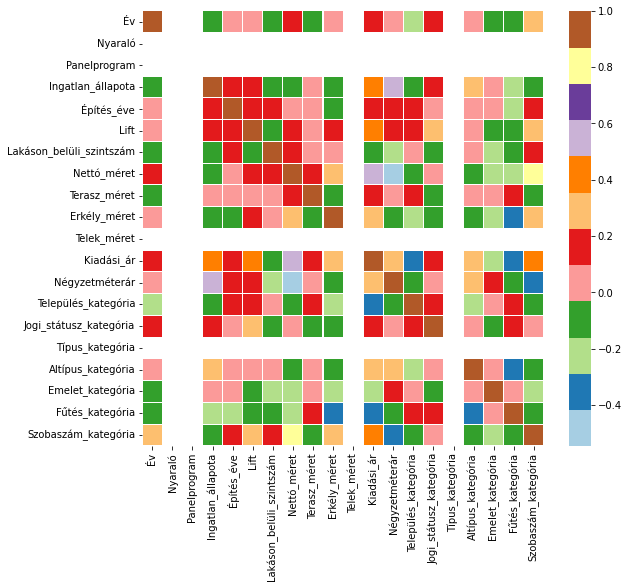

In [ ]:
corrmat = df_masolat_labeltop5_KESZ_berelt.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="Paired", linewidths = 0.1)

**Eladott:**

In [ ]:
#először kigyűjtöttem a top5öket amikket szűrnöm kell, majd egy új adatbázisba lementettem
"""
település:
Debrecen            91
Miskolc             59
Pécs                48
Nyíregyháza         40
Tatabánya           34
emelet:
0                 125
3                  80
2                  67
1                  62
4                  47
fűtés:
gaz_cirko                  138
tavegyedi                  100
gaz_konvektor               97
tav                         69
hazkozponti                 29
szobaszám:
2 + 0     168
3 + 0      71
1 + 0      54
2 + 1      47
1 + 1      45
"""
df_masolat_labeltop5_KESZ_eladott = df_masolat_labeltop5_eladott[((df_masolat_labeltop5_eladott.Település == "Debrecen") | (df_masolat_labeltop5_eladott.Település == "Miskolc") | (df_masolat_labeltop5_eladott.Település == "Pécs") | (df_masolat_labeltop5_eladott.Település == "Nyíregyháza") | (df_masolat_labeltop5_eladott.Település == "Tatabánya")) & ((df_masolat_labeltop5_eladott.Emelet == "0") | (df_masolat_labeltop5_eladott.Emelet == "3") | (df_masolat_labeltop5_eladott.Emelet == "2") | (df_masolat_labeltop5_eladott.Emelet == "1") | (df_masolat_labeltop5_eladott.Emelet == "4")) & ((df_masolat_labeltop5_eladott.Fűtés == "gaz_cirko") | (df_masolat_labeltop5_eladott.Fűtés == "tavegyedi") | (df_masolat_labeltop5_eladott.Fűtés == "gaz_konvektor") | (df_masolat_labeltop5_eladott.Fűtés == "tav") | (df_masolat_labeltop5_eladott.Fűtés == "hazkozponti")) & ((df_masolat_labeltop5_eladott.Szobaszám == "2 + 0") | (df_masolat_labeltop5_eladott.Szobaszám == "3 + 0") | (df_masolat_labeltop5_eladott.Szobaszám == "1 + 0") | (df_masolat_labeltop5_eladott.Szobaszám == "2 + 1") | (df_masolat_labeltop5_eladott.Szobaszám == "1 + 1"))]
#& (df_masolat_labeltop5_berelt.Emelet_kategória > 5) & (df_masolat_labeltop5_berelt.Fűtés_kategória > 5) & (df_masolat_labeltop5_berelt.Szobaszám_kategória > 5)]
print(df_masolat_labeltop5_KESZ_eladott)

       Település      Körzet    Év Jogi_státusz  Nyaraló       Típus  \
3       Debrecen    Belváros  2018     hasznalt        0  tarsashazi   
8    Nyíregyháza   Jósaváros  2018     hasznalt        0  tarsashazi   
10     Tatabánya     Újváros  2018     hasznalt        0  tarsashazi   
12       Miskolc    Belváros  2018     hasznalt        0  tarsashazi   
13       Miskolc  Kilián-dél  2018     hasznalt        0  tarsashazi   
..           ...         ...   ...          ...      ...         ...   
464     Debrecen   Sestakert  2020     hasznalt        0  tarsashazi   
469     Debrecen    Nagyerdő  2020     hasznalt        0  tarsashazi   
470      Miskolc     Avas I.  2020     hasznalt        0  tarsashazi   
486    Tatabánya     Újváros  2020     hasznalt        0  tarsashazi   
495  Nyíregyháza      Érkert  2020     hasznalt        0  tarsashazi   

                Altípus  Panelprogram  Ingatlan_állapota  Építés_éve  \
3                 tegla           0.0                  2       

In [ ]:
df_masolat_labeltop5_KESZ_eladott.corr()


,Év,Nyaraló,Panelprogram,Ingatlan_állapota,Építés_éve,Lift,Lakáson_belüli_szintszám,Nettó_méret,Terasz_méret,Erkély_méret,Telek_méret,Eladási_ár,Négyzetméterár,Település_kategória,Jogi_státusz_kategória,Típus_kategória,Altípus_kategória,Emelet_kategória,Fűtés_kategória,Szobaszám_kategória
Év,1.000000,NaN,0.075715,-0.140040,-0.057319,-0.123137,0.080163,-0.133502,0.035807,-0.149953,NaN,0.076612,0.180812,0.243333,-0.029182,NaN,0.086015,0.030544,-0.062799,0.224608
Nyaraló,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Panelprogram,0.075715,NaN,1.000000,0.068737,0.008912,0.060680,-0.017547,-0.125800,-0.062232,0.011604,NaN,-0.104404,-0.048867,0.029399,-0.081786,NaN,-0.055731,0.061779,0.208867,-0.026027
Ingatlan_állapota,-0.140040,NaN,0.068737,1.000000,0.465028,0.074586,-0.091493,-0.023510,0.163110,0.126310,NaN,0.292119,0.337414,-0.023760,0.240669,NaN,-0.109150,-0.058654,-0.058667,-0.025449
Építés_éve,-0.057319,NaN,0.008912,0.465028,1.000000,0.065419,0.014929,0.056902,0.327430,0.122253,NaN,0.352245,0.326481,-0.020792,0.551819,NaN,0.062995,-0.097435,-0.266938,0.060743
Lift,-0.123137,NaN,0.060680,0.074586,0.065419,1.000000,-0.060018,0.076802,0.162123,0.151571,NaN,0.152842,0.148859,-0.223849,0.176758,NaN,-0.051263,0.138591,0.117280,0.092138
Lakáson_belüli_szintszám,0.080163,NaN,-0.017547,-0.091493,0.014929,-0.060018,1.000000,0.012691,0.013818,-0.105997,NaN,-0.063856,-0.084713,0.132799,0.013790,NaN,0.121028,0.057857,-0.187233,0.031079
Nettó_méret,-0.133502,NaN,-0.125800,-0.023510,0.056902,0.076802,0.012691,1.000000,0.156034,0.247054,NaN,0.534730,-0.133580,-0.141180,-0.048653,NaN,0.077328,-0.006507,-0.132688,0.673184
Terasz_méret,0.035807,NaN,-0.062232,0.163110,0.327430,0.162123,0.013818,0.156034,1.000000,-0.152191,NaN,0.467057,0.375685,-0.164503,0.458531,NaN,0.107667,-0.148527,0.015756,0.077256
Erkély_méret,-0.149953,NaN,0.011604,0.126310,0.122253,0.151571,-0.105997,0.247054,-0.152191,1.000000,NaN,0.210816,0.062811,0.086462,-0.066082,NaN,0.056683,-0.095309,0.074969,0.238555


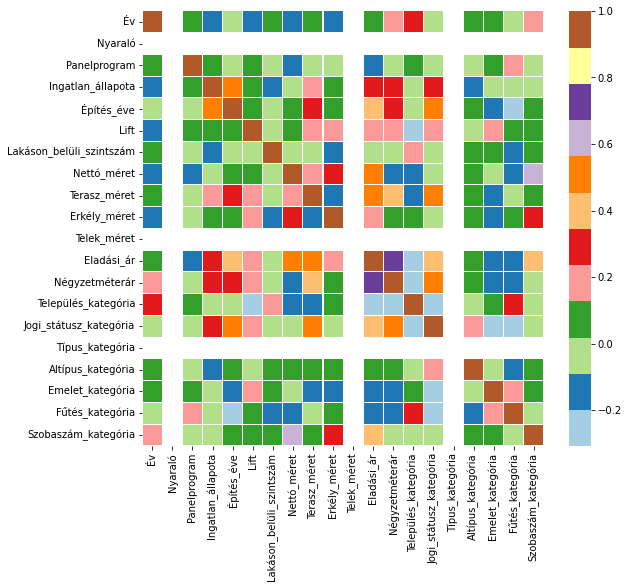

In [ ]:
corrmat = df_masolat_labeltop5_KESZ_eladott.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="Paired", linewidths = 0.1)

# **Korreláció top5-ős one hot encoding-gal**

A Jogi státusz, a Típus és az Altípust nem kell változtatni, alapból 5 vagy kevesebb fajtája van.

**Bérbeadott:**

In [ ]:
#a label encoding top5nél már kigyűjtöttem a top5öt mindből
#eldobom azokat az oszlopkat amik nekem nem kellenek, de mivel rentegeg oszlopot kéne felsorolnom, lehet rövidebb ha azt sorolom fel amit megtartok
"""
Település:
Kecskemét
Debrecen
Győr
Miskolc
Pécs
Jogi_státusz:
hasznalt
uj
Típus:
tarsashazi
csaladihaz
hazresz
sorhaz
ikerhaz
Altípus:
tegla
panel
csusztatott_zsalus
egyeb
Emelet:
2
1
3
földszint
0
Fűtés:
gaz_cirko
gaz_konvektor
tavegyedi
tav
hazkozponti
Szobaszám:
2 + 0
1 + 0
3 + 0
1 + 1
2 + 1
"""

df_masolat_onehottop5_berelt_KESZ=df_masolat_onehottop5_berelt[['Körzet', 'Év', 'Nyaraló', 'Panelprogram','Ingatlan_állapota', 'Építés_éve', 'Zárószint', 'Tájolás','Kilátás','Lift', 'Lakáson_belüli_szintszám', 'Nettó_méret','Terasz_méret', 'Erkély_méret', 'Telek_méret', 'Telek_méret_mértékegysége', 'Kiadási_ár', 'Négyzetméterár', 'Település_Kecskemét', 'Település_Debrecen', 'Település_Győr', 'Település_Miskolc', 'Település_Pécs', 'Jogi_státusz_hasznalt', 'Jogi_státusz_uj', 'Típus_tarsashazi', 'Típus_csaladihaz', 'Típus_hazresz', 'Típus_sorhaz', 'Típus_ikerhaz', 'Altípus_tegla', 'Altípus_panel', 'Altípus_csusztatott_zsalus', 'Altípus_egyeb', 'Emelet_2', 'Emelet_1', 'Emelet_3', 'Emelet_földszint', 'Emelet_0', 'Fűtés_gaz_cirko', 'Fűtés_gaz_konvektor', 'Fűtés_tavegyedi', 'Fűtés_tav', 'Fűtés_hazkozponti', 'Szobaszám_2 + 0', 'Szobaszám_1 + 0', 'Szobaszám_3 + 0', 'Szobaszám_1 + 1', 'Szobaszám_2 + 1']]

filtered_values = np.where(((df_masolat_onehottop5_berelt_KESZ['Település_Kecskemét']==1) | (df_masolat_onehottop5_berelt_KESZ['Település_Debrecen']==1) | (df_masolat_onehottop5_berelt_KESZ['Település_Győr']==1) | (df_masolat_onehottop5_berelt_KESZ['Település_Miskolc']==1) | (df_masolat_onehottop5_berelt_KESZ['Település_Pécs']==1)) & ((df_masolat_onehottop5_berelt_KESZ['Típus_tarsashazi']==1) | (df_masolat_onehottop5_berelt_KESZ['Típus_csaladihaz']==1) | (df_masolat_onehottop5_berelt_KESZ['Típus_hazresz']==1) | (df_masolat_onehottop5_berelt_KESZ['Típus_sorhaz']==1) | (df_masolat_onehottop5_berelt_KESZ['Típus_ikerhaz']==1)) & ((df_masolat_onehottop5_berelt_KESZ['Emelet_2']==1) | (df_masolat_onehottop5_berelt_KESZ['Emelet_1']==1) | (df_masolat_onehottop5_berelt_KESZ['Emelet_3']==1) | (df_masolat_onehottop5_berelt_KESZ['Emelet_földszint']==1) | (df_masolat_onehottop5_berelt_KESZ['Emelet_0']==1)) & ((df_masolat_onehottop5_berelt_KESZ['Fűtés_gaz_cirko']==1) | (df_masolat_onehottop5_berelt_KESZ['Fűtés_gaz_konvektor']==1) | (df_masolat_onehottop5_berelt_KESZ['Fűtés_tavegyedi']==1) | (df_masolat_onehottop5_berelt_KESZ['Fűtés_tav']==1) | (df_masolat_onehottop5_berelt_KESZ['Fűtés_hazkozponti']==1)) & ((df_masolat_onehottop5_berelt_KESZ['Szobaszám_2 + 0']==1) | (df_masolat_onehottop5_berelt_KESZ['Szobaszám_1 + 0']==1) | (df_masolat_onehottop5_berelt_KESZ['Szobaszám_3 + 0']==1) | (df_masolat_onehottop5_berelt_KESZ['Szobaszám_1 + 1']==1) | (df_masolat_onehottop5_berelt_KESZ['Szobaszám_2 + 1']==1))) 

#print(filtered_values)
display(df_masolat_onehottop5_berelt_KESZ.loc[filtered_values])

df_masolat_onehottop5_berelt_VEGLEGES=df_masolat_onehottop5_berelt_KESZ.loc[filtered_values]


,Körzet,Év,Nyaraló,Panelprogram,Ingatlan_állapota,Építés_éve,Zárószint,Tájolás,Kilátás,Lift,...,Fűtés_gaz_cirko,Fűtés_gaz_konvektor,Fűtés_tavegyedi,Fűtés_tav,Fűtés_hazkozponti,Szobaszám_2 + 0,Szobaszám_1 + 0,Szobaszám_3 + 0,Szobaszám_1 + 1,Szobaszám_2 + 1
4,Széchenyiváros,2018,0,0,4,1970,4,D,utcai,0,...,0,1,0,0,0,1,0,0,0,0
5,Belváros,2018,0,0,5,2006,2,K,utcai,0,...,0,0,0,0,1,0,0,0,1,0
8,Mecsekoldal,2018,0,0,4,1980,10,K,utcai,1,...,0,0,1,0,0,0,0,1,0,0
11,Belváros,2018,0,0,5,1950,2,K,utcai,0,...,0,1,0,0,0,1,0,0,0,0
19,Győr-Belváros,2018,0,0,3,1960,4,ÉK,udvari,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Belváros,2020,0,0,5,2017,3,D,kertre_nezo,1,...,0,0,0,0,1,1,0,0,0,0
190,Tócóskert,2020,0,0,4,1985,4,K,utcai,0,...,0,0,1,0,0,0,0,1,0,0
191,Csapókert,2020,0,0,4,1950,0,DNY,0,0,...,1,0,0,0,0,1,0,0,0,0
193,Győr-Belváros,2020,0,0,4,1970,2,DK,utcai,0,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
onehot_berelt_corr= df_masolat_onehottop5_berelt_VEGLEGES.corr()
pd.set_option('display.max_columns', None)
onehot_berelt_corr

,Év,Nyaraló,Panelprogram,Ingatlan_állapota,Építés_éve,Lift,Lakáson_belüli_szintszám,Nettó_méret,Terasz_méret,Erkély_méret,Telek_méret,Kiadási_ár,Négyzetméterár,Település_Kecskemét,Település_Debrecen,Település_Győr,Település_Miskolc,Település_Pécs,Jogi_státusz_hasznalt,Jogi_státusz_uj,Típus_tarsashazi,Típus_csaladihaz,Típus_hazresz,Típus_sorhaz,Típus_ikerhaz,Altípus_tegla,Altípus_panel,Altípus_csusztatott_zsalus,Altípus_egyeb,Emelet_2,Emelet_1,Emelet_3,Emelet_földszint,Emelet_0,Fűtés_gaz_cirko,Fűtés_gaz_konvektor,Fűtés_tavegyedi,Fűtés_tav,Fűtés_hazkozponti,Szobaszám_2 + 0,Szobaszám_1 + 0,Szobaszám_3 + 0,Szobaszám_1 + 1,Szobaszám_2 + 1
Év,1.000000,NaN,NaN,-0.136564,0.025091,0.009793,-0.118196,0.132440,-0.120228,-0.005949,0.021513,0.116188,-0.039983,-0.144178,0.188532,-0.077978,0.148042,-0.145002,-0.094695,0.094695,-0.110777,0.171150,-0.025993,NaN,-0.025993,0.053269,-0.045753,NaN,-0.025993,0.051111,-0.072177,0.180308,-0.216571,0.110777,0.275455,-0.310679,0.001148,-0.025993,0.074595,-0.068770,-0.114149,0.353156,-0.147970,-0.045753
Nyaraló,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Panelprogram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ingatlan_állapota,-0.136564,NaN,NaN,1.000000,0.096361,0.254580,-0.017228,-0.106802,0.081479,0.005998,-0.252924,0.438045,0.486487,0.032489,-0.022286,-0.022592,-0.004987,0.014953,-0.161034,0.161034,0.332933,-0.178216,-0.208350,NaN,-0.208350,0.262368,-0.178216,NaN,-0.208350,0.117359,-0.002115,0.076121,0.022333,-0.332933,0.048662,-0.069727,-0.324177,0.112961,0.314203,0.139471,0.025722,-0.217782,-0.015433,0.010310
Építés_éve,0.025091,NaN,NaN,0.096361,1.000000,0.194858,0.110300,-0.004650,0.056477,-0.098795,0.001313,0.169269,0.154633,0.096202,-0.200093,0.053568,0.092922,0.010801,-0.082907,0.082907,0.004540,-0.009383,-0.008390,NaN,0.014557,-0.026894,0.028990,NaN,0.003084,0.113174,-0.185032,0.068844,0.015038,-0.004540,0.123018,0.010974,-0.329713,-0.008390,0.126659,0.124936,0.033025,0.083034,-0.468663,0.032356
Lift,0.009793,NaN,NaN,0.254580,0.194858,1.000000,-0.085820,0.104055,0.077343,0.233430,-0.121878,0.377018,0.161361,-0.104685,-0.201867,0.161468,0.320805,-0.029146,-0.355740,0.355740,0.146976,-0.111965,-0.063609,NaN,-0.063609,-0.030083,0.071772,NaN,-0.063609,0.060743,0.048088,0.130919,-0.143034,-0.146976,0.188440,-0.417620,0.071938,-0.063609,0.320805,0.116510,-0.187660,0.210580,-0.130359,-0.111965
Lakáson_belüli_szintszám,-0.118196,NaN,NaN,-0.017228,0.110300,-0.085820,1.000000,0.111605,0.081306,0.015245,-0.113568,-0.030957,-0.218580,0.054353,-0.040036,0.084732,-0.177965,0.072104,0.143799,-0.143799,0.113741,-0.026041,-0.100871,NaN,-0.100871,-0.057883,0.125472,NaN,-0.100871,-0.082062,0.243592,0.044623,-0.138462,-0.113741,0.067788,-0.010189,-0.075354,-0.100871,0.027256,0.096077,-0.216175,0.008269,0.057883,0.125472
Nettó_méret,0.132440,NaN,NaN,-0.106802,-0.004650,0.104055,0.111605,1.000000,0.072029,0.159199,0.220574,0.582635,-0.588616,-0.078498,0.124900,0.046204,-0.019703,-0.108400,-0.064152,0.064152,-0.241832,0.274815,-0.257831,NaN,0.312758,-0.013292,0.008955,NaN,0.010681,-0.047935,-0.041986,0.169004,-0.211628,0.241832,0.484256,-0.424947,-0.000297,-0.014492,-0.069717,0.123286,-0.610512,0.433837,-0.218860,0.437285
Terasz_méret,-0.120228,NaN,NaN,0.081479,0.056477,0.077343,0.081306,0.072029,1.000000,-0.139393,-0.062387,0.212250,0.077116,-0.132039,-0.027006,-0.097680,0.177327,0.177653,0.046417,-0.046417,0.075234,-0.057313,-0.032560,NaN,-0.032560,0.066728,-0.057313,NaN,-0.032560,-0.002529,-0.009143,-0.060813,0.119281,-0.075234,0.004455,-0.167342,0.177327,-0.032560,0.092089,-0.045607,0.036448,-0.111214,-0.066728,0.302297
Erkély_méret,-0.005949,NaN,NaN,0.005998,-0.098795,0.233430,0.015245,0.159199,-0.139393,1.000000,-0.157160,0.241296,-0.024690,0.026699,

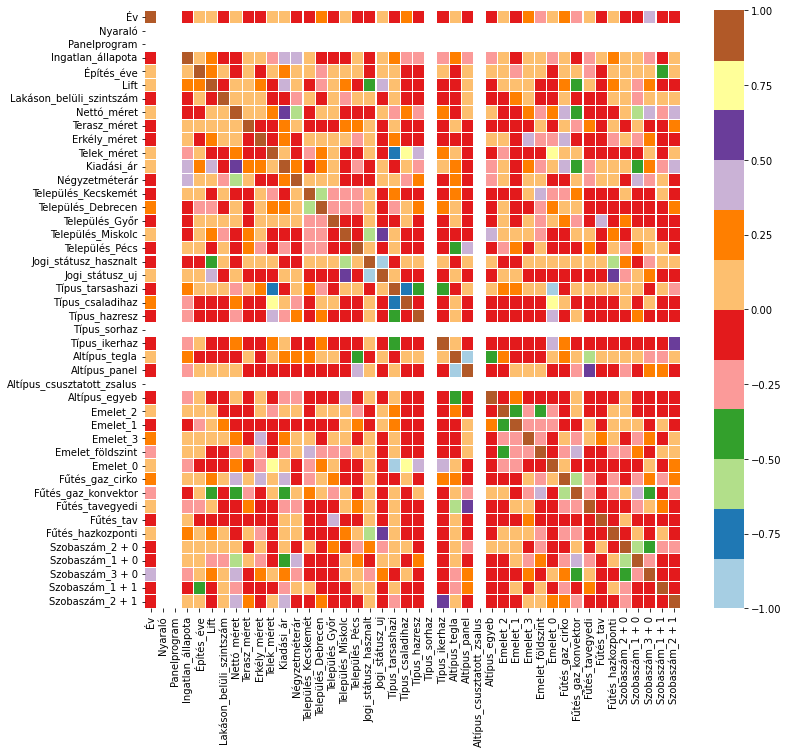

In [ ]:
corrmat = df_masolat_onehottop5_berelt_VEGLEGES.corr()
  
f, ax = plt.subplots(figsize =(12, 11))
sns.heatmap(corrmat, ax = ax, cmap ="Paired", linewidths = 0.1)

**Eladott:**

In [ ]:
"""
település:
Debrecen            91
Miskolc             59
Pécs                48
Nyíregyháza         40
Tatabánya           34
Jogi_státusz:
hasznalt
uj
Típus:
tarsashazi    375
csaladihaz    102
ikerhaz        11
sorhaz          6
tanya
Altípus:
tegla                 316
panel                 133
csusztatott_zsalus     28
vegyesfalazatu         11
valyog    
emelet:
0                 125
3                  80
2                  67
1                  62
4                  47
fűtés:
gaz_cirko                  138
tavegyedi                  100
gaz_konvektor               97
tav                         69
hazkozponti                 29
szobaszám:
2 + 0     168
3 + 0      71
1 + 0      54
2 + 1      47
1 + 1      45
"""

In [ ]:
df_masolat_onehottop5_eladott_KESZ=df_masolat_onehottop5_eladott[['Körzet', 'Év', 'Nyaraló', 'Panelprogram','Ingatlan_állapota', 'Építés_éve', 'Zárószint', 'Tájolás','Kilátás','Lift', 'Lakáson_belüli_szintszám', 'Nettó_méret','Terasz_méret', 'Erkély_méret', 'Telek_méret', 'Telek_méret_mértékegysége', 'Eladási_ár', 'Négyzetméterár', 'Település_Debrecen', 'Település_Miskolc', 'Település_Pécs', 'Település_Nyíregyháza', 'Település_Tatabánya', 'Jogi_státusz_hasznalt', 'Jogi_státusz_uj', 'Típus_tarsashazi', 'Típus_csaladihaz', 'Típus_ikerhaz', 'Típus_sorhaz', 'Típus_tanya', 'Altípus_tegla', 'Altípus_panel', 'Altípus_csusztatott_zsalus', 'Altípus_vegyesfalazatu', 'Altípus_valyog', 'Emelet_0', 'Emelet_3', 'Emelet_2', 'Emelet_1', 'Emelet_4', 'Fűtés_gaz_cirko', 'Fűtés_tavegyedi', 'Fűtés_gaz_konvektor', 'Fűtés_tav', 'Fűtés_hazkozponti', 'Szobaszám_2 + 0', 'Szobaszám_3 + 0', 'Szobaszám_1 + 0', 'Szobaszám_2 + 1', 'Szobaszám_1 + 1']]

filtered_values = np.where(((df_masolat_onehottop5_eladott_KESZ['Település_Debrecen']==1) | (df_masolat_onehottop5_eladott_KESZ['Település_Miskolc']==1) | (df_masolat_onehottop5_eladott_KESZ['Település_Pécs']==1) | (df_masolat_onehottop5_eladott_KESZ['Település_Nyíregyháza']==1) | (df_masolat_onehottop5_eladott_KESZ['Település_Tatabánya']==1)) & ((df_masolat_onehottop5_eladott_KESZ['Típus_tarsashazi']==1) | (df_masolat_onehottop5_eladott_KESZ['Típus_csaladihaz']==1) | (df_masolat_onehottop5_eladott_KESZ['Típus_ikerhaz']==1) | (df_masolat_onehottop5_eladott_KESZ['Típus_sorhaz']==1) | (df_masolat_onehottop5_eladott_KESZ['Típus_tanya']==1)) & ((df_masolat_onehottop5_eladott_KESZ['Altípus_tegla']==1) | (df_masolat_onehottop5_eladott_KESZ['Altípus_panel']==1) | (df_masolat_onehottop5_eladott_KESZ['Altípus_csusztatott_zsalus']==1) | (df_masolat_onehottop5_eladott_KESZ['Altípus_vegyesfalazatu']==1) | (df_masolat_onehottop5_eladott_KESZ['Altípus_valyog']==1)) & ((df_masolat_onehottop5_eladott_KESZ['Emelet_0']==1) | (df_masolat_onehottop5_eladott_KESZ['Emelet_3']==1) | (df_masolat_onehottop5_eladott_KESZ['Emelet_2']==1) | (df_masolat_onehottop5_eladott_KESZ['Emelet_1']==1) | (df_masolat_onehottop5_eladott_KESZ['Emelet_4']==1)) & ((df_masolat_onehottop5_eladott_KESZ['Fűtés_gaz_cirko']==1) | (df_masolat_onehottop5_eladott_KESZ['Fűtés_gaz_konvektor']==1) | (df_masolat_onehottop5_eladott_KESZ['Fűtés_tavegyedi']==1) | (df_masolat_onehottop5_eladott_KESZ['Fűtés_tav']==1) | (df_masolat_onehottop5_eladott_KESZ['Fűtés_hazkozponti']==1)) & ((df_masolat_onehottop5_eladott_KESZ['Szobaszám_2 + 0']==1) | (df_masolat_onehottop5_eladott_KESZ['Szobaszám_3 + 0']==1) | (df_masolat_onehottop5_eladott_KESZ['Szobaszám_1 + 0']==1) | (df_masolat_onehottop5_eladott_KESZ['Szobaszám_2 + 1']==1) | (df_masolat_onehottop5_eladott_KESZ['Szobaszám_1 + 1']==1))) 

#print(filtered_values)
display(df_masolat_onehottop5_eladott_KESZ.loc[filtered_values])

df_masolat_onehottop5_eladott_VEGLEGES=df_masolat_onehottop5_eladott_KESZ.loc[filtered_values]

,Körzet,Év,Nyaraló,Panelprogram,Ingatlan_állapota,Építés_éve,Zárószint,Tájolás,Kilátás,Lift,Lakáson_belüli_szintszám,Nettó_méret,Terasz_méret,Erkély_méret,Telek_méret,Telek_méret_mértékegysége,Eladási_ár,Négyzetméterár,Település_Debrecen,Település_Miskolc,Település_Pécs,Település_Nyíregyháza,Település_Tatabánya,Jogi_státusz_hasznalt,Jogi_státusz_uj,Típus_tarsashazi,Típus_csaladihaz,Típus_ikerhaz,Típus_sorhaz,Típus_tanya,Altípus_tegla,Altípus_panel,Altípus_csusztatott_zsalus,Altípus_vegyesfalazatu,Altípus_valyog,Emelet_0,Emelet_3,Emelet_2,Emelet_1,Emelet_4,Fűtés_gaz_cirko,Fűtés_tavegyedi,Fűtés_gaz_konvektor,Fűtés_tav,Fűtés_hazkozponti,Szobaszám_2 + 0,Szobaszám_3 + 0,Szobaszám_1 + 0,Szobaszám_2 + 1,Szobaszám_1 + 1
3,Belváros,2018,0,0.0,2,1972,10,NY,utcai,1,1,46.0,0.0,7.7,0.0,nm,12300000,267391.30,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
5,Felső-Józsa,2018,0,0.0,5,1980,0,ÉNY,0,0,0,80.0,0.0,0.0,761.0,nm,25900000,323750.00,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
8,Jósaváros,2018,0,1.0,5,1978,4,K,utcai,0,0,35.0,0.0,0.0,0.0,nm,9490000,271142.86,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
9,Kerekes-telep,2018,0,0.0,4,1970,0,D,0,0,0,80.0,12.0,0.0,730.0,nm,24300000,303750.00,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
10,Újváros,2018,0,0.0,4,1965,4,NY,utcai,0,0,42.0,0.0,2.0,0.0,nm,9650000,229761.90,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,Sestakert,2020,0,0.0,4,1967,4,NY,utcai,0,0,48.0,0.0,0.0,0.0,0,23000000,479166.67,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
469,Nagyerdő,2020,0,0.0,4,1996,3,DK,kertre_nezo,0,0,42.0,0.0,0.0,0.0,0,20350000,484523.81,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
470,Avas I.,2020,0,0.0,4,1973,9,K,utcai,1,0,54.0,0.0,2.2,0.0,0,10500000,194444.44,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
486,Újváros,2020,0,0.0,5,1970,4,K,udvari,0,0,43.0,0.0,0.3,0.0,0,17300000,402325.58,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [ ]:
df_masolat_onehottop5_eladott_VEGLEGES.corr()

,Év,Nyaraló,Panelprogram,Ingatlan_állapota,Építés_éve,Lift,Lakáson_belüli_szintszám,Nettó_méret,Terasz_méret,Erkély_méret,Telek_méret,Eladási_ár,Négyzetméterár,Település_Debrecen,Település_Miskolc,Település_Pécs,Település_Nyíregyháza,Település_Tatabánya,Jogi_státusz_hasznalt,Jogi_státusz_uj,Típus_tarsashazi,Típus_csaladihaz,Típus_ikerhaz,Típus_sorhaz,Típus_tanya,Altípus_tegla,Altípus_panel,Altípus_csusztatott_zsalus,Altípus_vegyesfalazatu,Altípus_valyog,Emelet_0,Emelet_3,Emelet_2,Emelet_1,Emelet_4,Fűtés_gaz_cirko,Fűtés_tavegyedi,Fűtés_gaz_konvektor,Fűtés_tav,Fűtés_hazkozponti,Szobaszám_2 + 0,Szobaszám_3 + 0,Szobaszám_1 + 0,Szobaszám_2 + 1,Szobaszám_1 + 1
Év,1.000000,NaN,0.085854,-0.057050,-0.001806,-0.064212,0.078127,-0.104551,-0.075285,-0.079059,-0.025378,0.053286,0.172339,-0.255287,0.043209,0.098722,-0.006474,0.170291,0.007393,-0.007393,0.136348,-0.088200,-0.118331,-0.083348,NaN,-0.057287,-0.002416,-0.037246,0.169608,0.041909,-0.136348,1.602317e-01,-0.111670,0.052079,0.032454,0.048772,-0.027005,-0.090068,0.019804,0.085854,0.172177,1.676362e-01,0.059779,-0.212339,-0.265302
Nyaraló,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Panelprogram,0.085854,NaN,1.000000,0.093600,0.030743,0.099427,0.015527,-0.146218,-0.090978,0.059056,-0.095298,-0.090508,0.002947,-0.158472,0.087661,0.225897,-0.030207,-0.109190,0.061089,-0.061089,0.143294,-0.134166,-0.032009,-0.022546,NaN,-0.329238,0.430290,-0.065574,-0.051215,-0.032009,-0.143294,8.766086e-02,0.055161,-0.034843,0.043154,-0.143294,0.315579,-0.143294,-0.064285,0.067623,0.035801,-4.801383e-02,0.046201,-0.020473,-0.009981
Ingatlan_állapota,-0.057050,NaN,0.093600,1.000000,0.464051,0.134144,-0.085156,-0.081509,0.011987,0.185351,-0.207728,0.325538,0.393330,-0.107561,0.134904,-0.013224,0.007741,-0.018435,-0.235207,0.235207,0.252001,-0.267406,0.077624,-0.080282,NaN,-0.134254,0.172811,0.093600,-0.141491,-0.050111,-0.252001,4.305441e-03,0.007741,0.154017,0.113145,0.116919,0.022962,-0.325785,0.097590,0.159019,-0.110631,-4.323344e-02,0.031768,0.155858,0.021359
Építés_éve,-0.001806,NaN,0.030743,0.464051,1.000000,0.102445,0.033445,-0.023663,0.202630,0.156114,-0.098533,0.337556,0.350002,0.009572,-0.172621,0.051444,0.160081,-0.030117,-0.507337,0.507337,0.159842,-0.149367,-0.034335,-0.028461,NaN,-0.003826,0.073785,-0.039236,-0.084085,-0.040407,-0.159842,-3.779921e-02,-0.071147,0.191908,0.096617,0.347039,-0.142463,-0.410652,0.022516,0.323097,-0.102347,9.249299e-02,0.052538,0.047566,-0.050605
Lift,-0.064212,NaN,0.099427,0.134144,0.102445,1.000000,0.012102,-0.096987,-0.031586,0.235156,-0.194984,0.137315,0.225261,0.135743,0.068327,-0.036853,-0.136662,-0.067820,-0.206616,0.206616,0.293185,-0.274510,-0.065492,-0.046130,NaN,-0.210288,0.284293,0.021562,-0.104787,-0.065492,-0.293185,1.571513e-01,-0.036853,0.002263,0.184753,-0.117544,0.201564,-0.249275,0.068327,0.177291,-0.002325,-7.484812e-02,-0.151248,0.139630,0.060846
Lakáson_belüli_szintszám,0.078127,NaN,0.015527,-0.085156,0.033445,0.012102,1.000000,-0.083855,-0.034406,-0.016635,-0.140035,-0.059980,-0.015987,-0.197346,-0.053137,0.318443,-0.069660,0.048262,-0.041328,0.041328,0.217441,-0.184559,-0.090951,-0.064062,NaN,0.098811,0.008490,-0.051756,-0.145521,-0.090951,-0.217441,2.361640e-02,0.016586,0.044001,0.153875,0.010215,0.061993,0.010215,-0.129890,0.082809,0.183357,-8.084521e-02,-0.028006,-0.086181,-0.057618
Nettó_méret,-0.104551,NaN,-0.146218,-0.081509,-0.023663,-0.096987,-0.083855,1.000000,0.333171,-0.019991,0.520766,0.467468,-0.261742,0.072251,-0.063024,-0.051584,0.162413,-0.131189,0.094465,-0.094465,-0.485104,0.510284,0.038880,-0.089666,NaN,0.100588,-0.222120,-0.093843,0.223788,0.230628,0.485104,-1.591802e-01,0.021847,-0.190562,-0.193639,0.363175,-0.138642,-0.041006,-0.204924,0.031055,-0.191041,5.232836e-01,-0.330892,0.216461,-0.302967
Terasz_méret,-0.075285,NaN,-0.090978,0.011987,0.202630,-0.031586,-0.034406,0.333171,1.0000

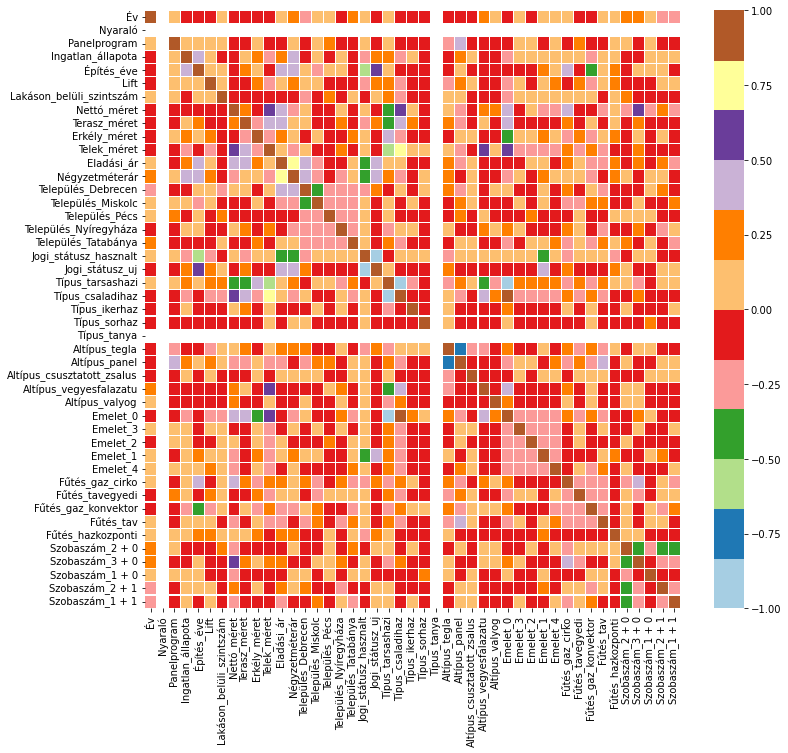

In [ ]:
corrmat = df_masolat_onehottop5_eladott_VEGLEGES.corr()
  
f, ax = plt.subplots(figsize =(12, 11))
sns.heatmap(corrmat, ax = ax, cmap ="Paired", linewidths = 0.1)

# **Sklearn sima label encodingra**

Először a sima df_masolat_berelt adatbázis nézem meg

In [ ]:
print(df_masolat_berelt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Település                  200 non-null    category
 1   Körzet                     200 non-null    object  
 2   Év                         200 non-null    int64   
 3   Jogi_státusz               200 non-null    category
 4   Nyaraló                    200 non-null    int64   
 5   Típus                      200 non-null    category
 6   Altípus                    200 non-null    category
 7   Panelprogram               200 non-null    int64   
 8   Ingatlan_állapota          200 non-null    int64   
 9   Építés_éve                 200 non-null    int64   
 10  Zárószint                  200 non-null    object  
 11  Emelet                     200 non-null    category
 12  Tájolás                    200 non-null    object  
 13  Kilátás                    200 non-

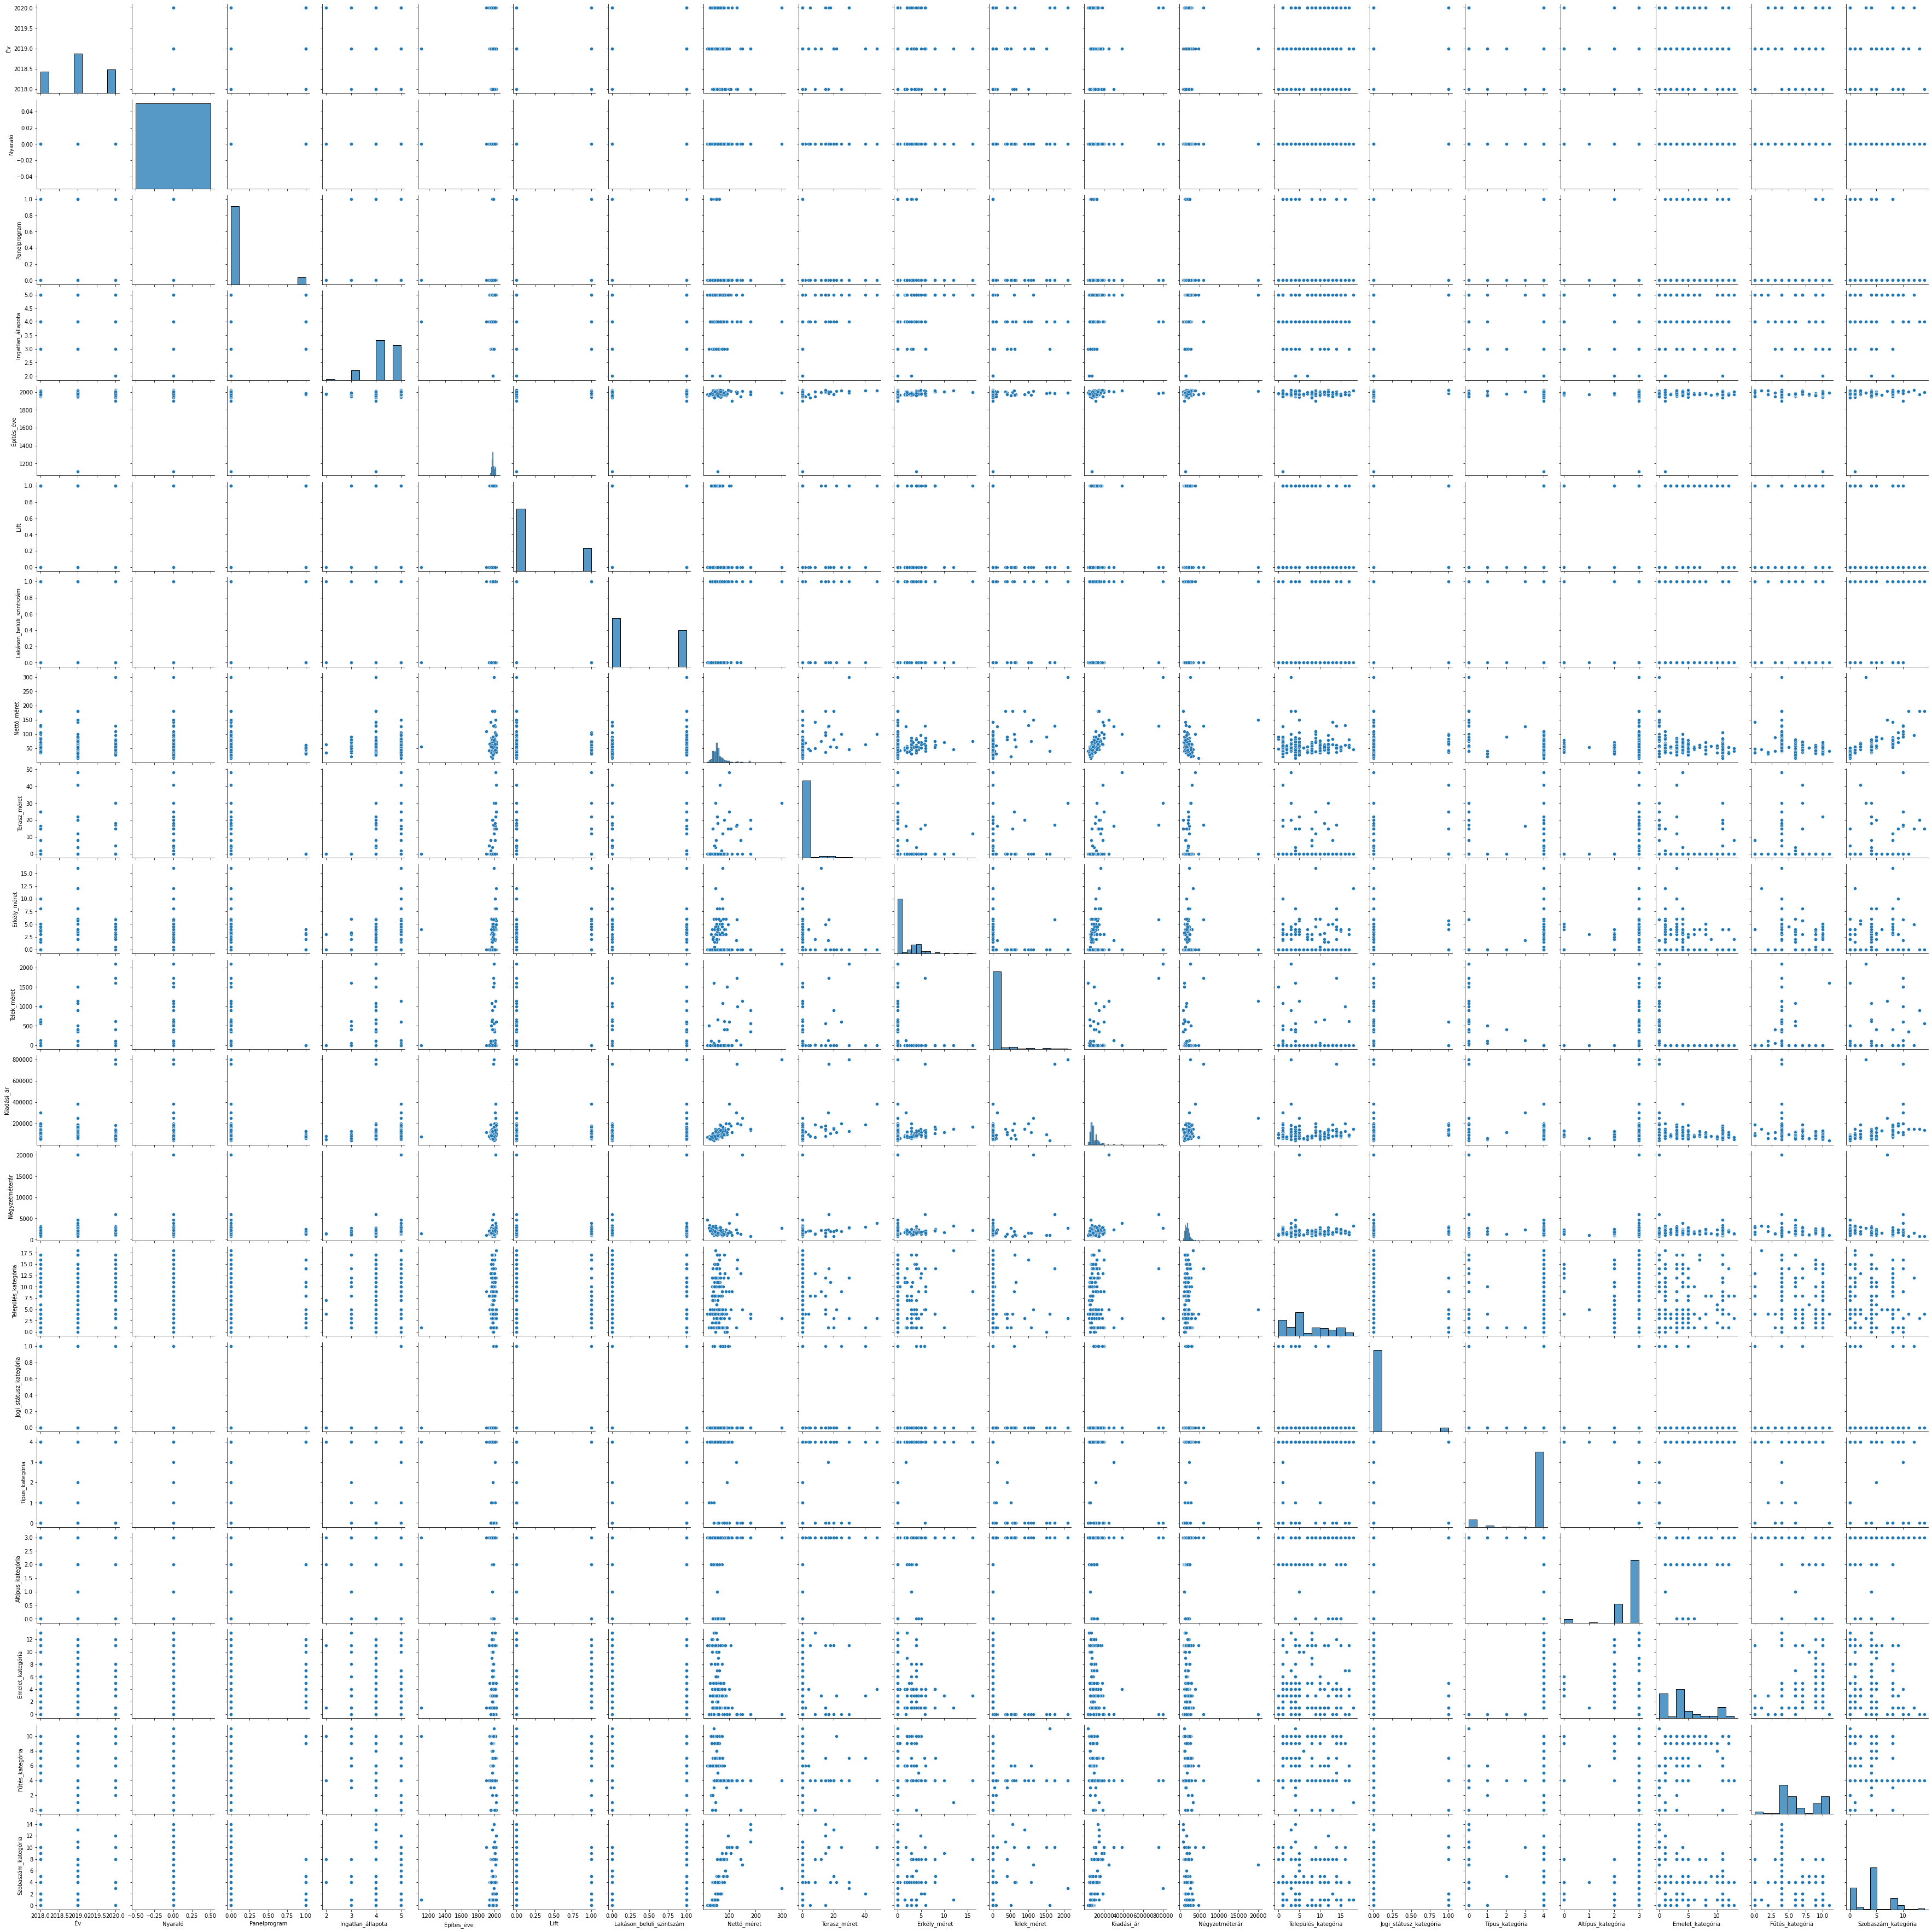

In [ ]:
sns.pairplot(df_masolat_berelt)
plt.show()

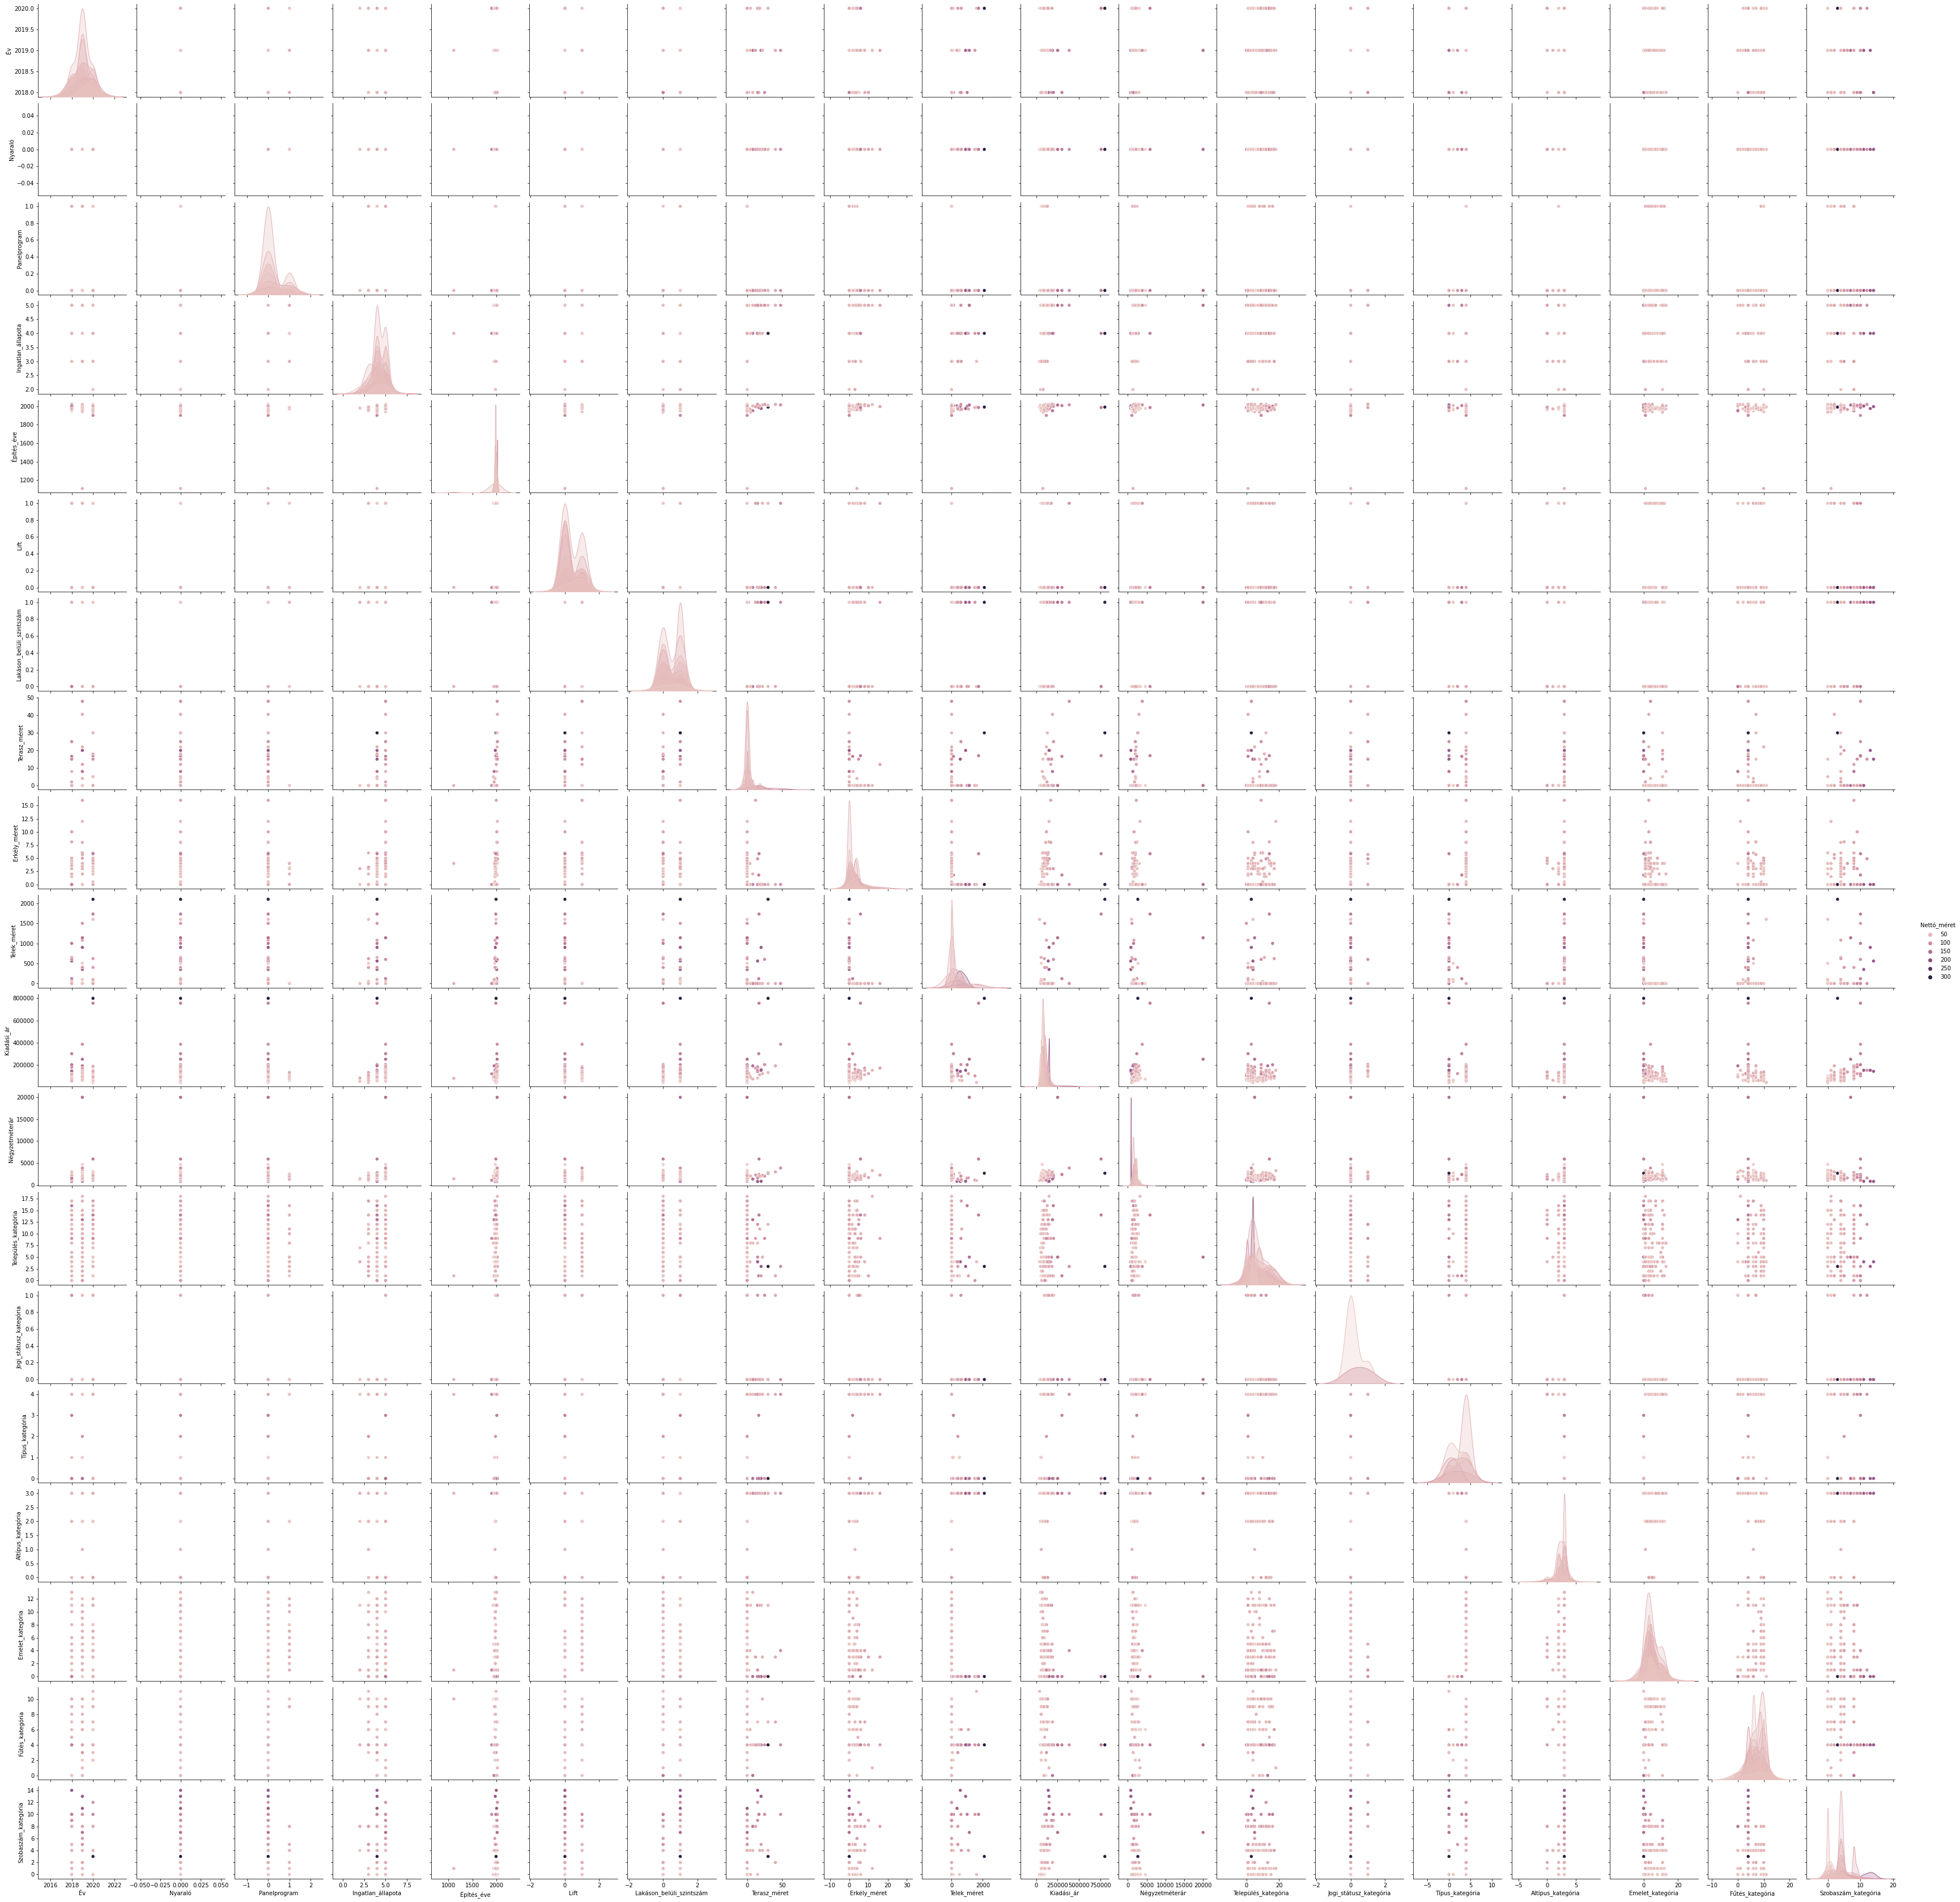

In [ ]:
sns.pairplot(df_masolat_berelt, hue='Nettó_méret')
plt.show()

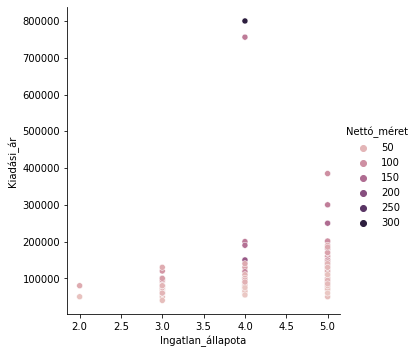

In [ ]:
sns.relplot(data=df_masolat_berelt, x='Ingatlan_állapota', y='Kiadási_ár', hue='Nettó_méret')
plt.show()

**Bérbeadott:**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# X és y új változók létrehozása
X = df_masolat_berelt[['Év', 'Ingatlan_állapota', 'Nettó_méret', 'Négyzetméterár', 'Település_kategória','Típus_kategória', 'Fűtés_kategória']]
y = df_masolat_berelt['Kiadási_ár']

# szétszedjuük kiértékelő és teszt adatbázisokká
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.9)

# új modelt hozunk létre és a fit() fgvnyt használjuk rá
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Új értékek előrejelzése 
predictions = multi_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8136743561321258
The rmse is:  267941399.83720952


**A modellnek két attribútuma van:**



*   .coef_ amely a modellünk együtthatóinak tömbjét tárolja
*   .intercept_ amely a lineáris modellünk y-metszetét tárolja




In [ ]:
# értékük kiiratása
print(multi_model.coef_)
print(multi_model.intercept_)

[ 1.14499132e+04  1.23521931e+04  1.85450916e+03  1.16408553e+01
  6.64064371e+02  4.52555119e+03 -7.71919298e+02]
-23210534.13470496


In [ ]:
# hogy saját kezüleg is tudjak tesztelni 
coefficients = multi_model.coef_
intercept = multi_model.intercept_
def calculate_charges_simalabel_berelt(ev, ing_allapot, netto_meret, negyzetmeter, telepules_kat, tipus_kat, futes_kat):
  return (ev * coefficients[0]) + (ing_allapot * coefficients[1]) + (netto_meret * coefficients[2]) + (negyzetmeter * coefficients[3]) + (telepules_kat * coefficients[4]) + (tipus_kat * coefficients[5]) + (futes_kat * coefficients[6]) + intercept


In [ ]:
# teszt random saját adattal
print(calculate_charges_simalabel_berelt(2020, 5, 150, 2000, 1, 4, 4))

297188.2676095776


**Eladott:**

In [ ]:
# X és y új változók létrehozása
X = df_masolat_eladott[['Év', 'Ingatlan_állapota', 'Nettó_méret', 'Négyzetméterár', 'Település_kategória','Típus_kategória', 'Fűtés_kategória']]
y = df_masolat_eladott['Eladási_ár']

# szétszedjuük kiértékelő és teszt adatbázisokká
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.9)

# új modelt hozunk létre és a fit() fgvnyt használjuk rá
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Új értékek előrejelzése 
predictions = multi_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.9142601508035112
The rmse is:  10719713136251.734


In [ ]:
# hogy saját kezüleg is tudjak tesztelni 
coefficients = multi_model.coef_
intercept = multi_model.intercept_
def calculate_charges_simalabel_berelt(ev, ing_allapot, netto_meret, negyzetmeter, telepules_kat, tipus_kat, futes_kat):
  return (ev * coefficients[0]) + (ing_allapot * coefficients[1]) + (netto_meret * coefficients[2]) + (negyzetmeter * coefficients[3]) + (telepules_kat * coefficients[4]) + (tipus_kat * coefficients[5]) + (futes_kat * coefficients[6]) + intercept


In [ ]:
# teszt random saját adattal
print(calculate_charges_simalabel_berelt(2020, 2, 150, 2000, 1, 4, 4))


18961158.76284039


In [ ]:
df_masolat_eladott[['Település', 'Ingatlan_állapota', 'Nettó_méret', 'Négyzetméterár', 'Település_kategória','Típus_kategória', 'Fűtés_kategória']]

# **Sklearn label encoding top5-re**

**Bérbeadott:**

In [ ]:
#Év, Nyaraló, Panelprogram, Ingatlan_állapota, Építés_éve, Zárószint, Tájolás, Kilátás, Lift,    
#Nettó_méret, Terasz_méret, Erkély_méret, Telek_méret, Szobaszám, Kiadási_ár, Négyzetméterár, Település_kategória, Jogi_státusz_kategória         
#Típus_kategória, Altípus_kategória, Emelet_kategória, Fűtés_kategória, Szobaszám_kategória

# X és y új változók létrehozása
X = df_masolat_labeltop5_KESZ_berelt[['Év', 'Ingatlan_állapota', 'Nettó_méret', 'Négyzetméterár', 'Település_kategória','Típus_kategória', 'Fűtés_kategória']]
y = df_masolat_labeltop5_KESZ_berelt['Kiadási_ár']

# szétszedjuük kiértékelő és teszt adatbázisokká
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.9)

# új modelt hozunk létre és a fit() fgvnyt használjuk rá
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Új értékek előrejelzése 
predictions = multi_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.9443242263484548
The rmse is:  41486184.11674168


In [ ]:
# hogy saját kezüleg is tudjak tesztelni 
#'Év', 'Ingatlan_állapota', 'Nettó_méret', 'Négyzetméterár', 'Település_kategória','Típus_kategória', 'Fűtés_kategória'
coefficients = multi_model.coef_
intercept = multi_model.intercept_
def calculate_charges_labeltop5_berbeadott(ev, ing_allapot, netto_meret, negyzetmeter, telepules_kat, tipus_kat, futes_kat):
  return (ev * coefficients[0]) + (ing_allapot * coefficients[1]) + (netto_meret * coefficients[2]) + (negyzetmeter * coefficients[3]) + (telepules_kat * coefficients[4]) + (tipus_kat * coefficients[5]) + (futes_kat * coefficients[6]) + intercept


In [ ]:
# teszt random saját adattal
print(calculate_charges_labeltop5_berbeadott(2020, 5, 150, 2000, 1, 4, 4))


289497.71782526234


**Eladott:**

In [ ]:
#Év, Nyaraló, Panelprogram, Ingatlan_állapota, Építés_éve, Zárószint, Tájolás, Kilátás, Lift,    
#Nettó_méret, Terasz_méret, Erkély_méret, Telek_méret, Szobaszám, Eladási_ár, Négyzetméterár, Település_kategória, Jogi_státusz_kategória         
#Típus_kategória, Altípus_kategória, Emelet_kategória, Fűtés_kategória, Szobaszám_kategória

# X és y új változók létrehozása
X = df_masolat_labeltop5_KESZ_eladott[['Év', 'Ingatlan_állapota', 'Nettó_méret', 'Négyzetméterár', 'Település_kategória','Típus_kategória', 'Fűtés_kategória']]
y = df_masolat_labeltop5_KESZ_eladott['Eladási_ár']

# szétszedjuük kiértékelő és teszt adatbázisokká
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.9)

# új modelt hozunk létre és a fit() fgvnyt használjuk rá
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Új értékek előrejelzése 
predictions = multi_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.9744509325935954
The rmse is:  1994285179717.9055


In [ ]:
# hogy saját kezüleg is tudjak tesztelni 
#'Év', 'Ingatlan_állapota', 'Nettó_méret', 'Négyzetméterár', 'Település_kategória','Típus_kategória', 'Fűtés_kategória'
coefficients = multi_model.coef_
intercept = multi_model.intercept_
def calculate_charges_labeltop5_eladott(ev, ing_allapot, netto_meret, negyzetmeter, telepules_kat, tipus_kat, futes_kat):
  return (ev * coefficients[0]) + (ing_allapot * coefficients[1]) + (netto_meret * coefficients[2]) + (negyzetmeter * coefficients[3]) + (telepules_kat * coefficients[4]) + (tipus_kat * coefficients[5]) + (futes_kat * coefficients[6]) + intercept
  

In [ ]:
# teszt random saját adattal
print(calculate_charges_labeltop5_eladott(2020, 2, 150, 2000, 1, 4, 4))


19724195.1900481


In [ ]:
df_masolat_labeltop5_KESZ_eladott[['Település', 'Ingatlan_állapota', 'Nettó_méret', 'Négyzetméterár', 'Település_kategória','Típus_kategória', 'Fűtés_kategória']]

# **Sklearn one hot encoding top5-re**

**Bérbeadott:**

In [ ]:
# 'Körzet', 'Év', 'Nyaraló', 'Panelprogram','Ingatlan_állapota', 'Építés_éve', 'Zárószint', 'Tájolás','Kilátás','Lift', 'Lakáson_belüli_szintszám', 'Nettó_méret','Terasz_méret',
# 'Erkély_méret', 'Telek_méret', 'Telek_méret_mértékegysége', 'Kiadási_ár', 'Négyzetméterár', 'Település_Kecskemét', 'Település_Debrecen', 'Település_Győr', 'Település_Miskolc',
# 'Település_Pécs', 'Jogi_státusz_hasznalt', 'Jogi_státusz_uj', 'Típus_tarsashazi', 'Típus_csaladihaz', 'Típus_hazresz', 'Típus_sorhaz', 'Típus_ikerhaz', 'Altípus_tegla', 
# 'Altípus_panel', 'Altípus_csusztatott_zsalus', 'Altípus_egyeb', 'Emelet_2', 'Emelet_1', 'Emelet_3', 'Emelet_földszint', 'Emelet_0', 'Fűtés_gaz_cirko',
# 'Fűtés_gaz_konvektor', 'Fűtés_tavegyedi', 'Fűtés_tav', 'Fűtés_hazkozponti', 'Szobaszám_2 + 0', 'Szobaszám_1 + 0', 'Szobaszám_3 + 0', 'Szobaszám_1 + 1', 'Szobaszám_2 + 1'

#ezek kellenek
#'Év', 'Ingatlan_állapota', 'Nettó_méret', 'Négyzetméterár', 'Település_kategória','Típus_kategória', 'Fűtés_kategória'
#19 változó

# X és y új változók létrehozása
X = df_masolat_onehottop5_berelt_VEGLEGES[['Év', 'Ingatlan_állapota', 'Nettó_méret', 'Négyzetméterár', 'Település_Kecskemét', 'Település_Debrecen', 'Település_Győr', 'Település_Miskolc', 'Település_Pécs', 'Típus_tarsashazi', 'Típus_csaladihaz', 'Típus_hazresz', 'Típus_sorhaz', 'Típus_ikerhaz', 'Fűtés_gaz_cirko', 'Fűtés_gaz_konvektor', 'Fűtés_tavegyedi', 'Fűtés_tav', 'Fűtés_hazkozponti']]
y = df_masolat_onehottop5_berelt_VEGLEGES['Kiadási_ár']

# szétszedjuük kiértékelő és teszt adatbázisokká
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.9)

# új modelt hozunk létre és a fit() fgvnyt használjuk rá
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Új értékek előrejelzése 
predictions = multi_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.878814252138307
The rmse is:  68754363.07255237


In [ ]:
# hogy saját kezüleg is tudjak tesztelni 19 adat
#'Év', 'Ingatlan_állapota', 'Nettó_méret', 'Négyzetméterár', 'Település_Kecskemét', 'Település_Debrecen', 'Település_Győr', 'Település_Miskolc', 'Település_Pécs', 
#'Típus_tarsashazi', 'Típus_csaladihaz', 'Típus_hazresz', 'Típus_sorhaz', 'Típus_ikerhaz', 'Fűtés_gaz_cirko', 'Fűtés_gaz_konvektor', 'Fűtés_tavegyedi', 'Fűtés_tav',
# 'Fűtés_hazkozponti'
coefficients = multi_model.coef_
intercept = multi_model.intercept_
def calculate_charges_onehottop5_kiadott(ev, ing_allapot, netto_meret, negyzetmeter, telepules_kecs, telepules_deb, telepules_gyor, telepules_mis, telepules_pecs, tipus_tarsashazi, tipus_csaladihaz, tipus_hazresz, tipus_sorhaz, tipus_ikerhaz, futes_gaz_cirko, futes_gaz_konvektor, futes_tavegyedi, futes_tav, futes_hazkozponti):
  return (ev * coefficients[0]) + (ing_allapot * coefficients[1]) + (netto_meret * coefficients[2]) + (negyzetmeter * coefficients[3]) + (telepules_kecs * coefficients[4]) + (telepules_deb * coefficients[5]) + (telepules_gyor * coefficients[6]) + (telepules_mis * coefficients[7]) + (telepules_pecs * coefficients[8]) + (tipus_tarsashazi * coefficients[9]) + (tipus_csaladihaz * coefficients[10]) + (tipus_hazresz * coefficients[11]) + (tipus_sorhaz * coefficients[12]) + (tipus_ikerhaz * coefficients[13]) + (futes_gaz_cirko * coefficients[14]) + (futes_gaz_konvektor * coefficients[15]) + (futes_tavegyedi * coefficients[16]) + (futes_tav * coefficients[17]) + (futes_hazkozponti * coefficients[18]) + intercept
  

In [ ]:
# teszt random saját adattal
print(calculate_charges_onehottop5_kiadott(2020, 5, 150, 2000, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0))

275946.04372141685


**Eladott:**

In [ ]:
#19 változó
#'Körzet', 'Év', 'Nyaraló', 'Panelprogram','Ingatlan_állapota', 'Építés_éve', 'Zárószint', 'Tájolás','Kilátás','Lift', 'Lakáson_belüli_szintszám', 'Nettó_méret','Terasz_méret', 
#'Erkély_méret', 'Telek_méret', 'Telek_méret_mértékegysége', 'Eladási_ár', 'Négyzetméterár', 'Település_Debrecen', 'Település_Miskolc', 'Település_Pécs', 'Település_Nyíregyháza', 
#'Település_Tatabánya', 'Jogi_státusz_hasznalt', 'Jogi_státusz_uj', 'Típus_tarsashazi', 'Típus_csaladihaz', 'Típus_ikerhaz', 'Típus_sorhaz', 'Típus_tanya', 'Altípus_tegla', 
#'Altípus_panel', 'Altípus_csusztatott_zsalus', 'Altípus_vegyesfalazatu', 'Altípus_valyog', 'Emelet_0', 'Emelet_3', 'Emelet_2', 'Emelet_1', 'Emelet_4', 'Fűtés_gaz_cirko', 
#'Fűtés_tavegyedi', 'Fűtés_gaz_konvektor', 'Fűtés_tav', 'Fűtés_hazkozponti', 'Szobaszám_2 + 0', 'Szobaszám_3 + 0', 'Szobaszám_1 + 0', 'Szobaszám_2 + 1', 'Szobaszám_1 + 1'

# X és y új változók létrehozása
X = df_masolat_onehottop5_eladott_KESZ[['Év', 'Ingatlan_állapota', 'Nettó_méret', 'Négyzetméterár', 'Település_Debrecen', 'Település_Miskolc', 'Település_Pécs', 'Település_Nyíregyháza', 'Település_Tatabánya', 'Típus_tarsashazi', 'Típus_csaladihaz', 'Típus_ikerhaz', 'Típus_sorhaz', 'Típus_tanya',  'Fűtés_gaz_cirko', 'Fűtés_tavegyedi', 'Fűtés_gaz_konvektor', 'Fűtés_tav', 'Fűtés_hazkozponti']]
y = df_masolat_onehottop5_eladott_KESZ['Eladási_ár']

# szétszedjuük kiértékelő és teszt adatbázisokká
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.9)

# új modelt hozunk létre és a fit() fgvnyt használjuk rá
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Új értékek előrejelzése 
predictions = multi_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.9073754889776802
The rmse is:  5336027942344.909


In [ ]:
#'Év', 'Ingatlan_állapota', 'Nettó_méret', 'Négyzetméterár', 'Település_Debrecen', 'Település_Miskolc', 'Település_Pécs', 'Település_Nyíregyháza', 'Település_Tatabánya', 
#'Típus_tarsashazi', 'Típus_csaladihaz', 'Típus_ikerhaz', 'Típus_sorhaz', 'Típus_tanya',  'Fűtés_gaz_cirko', 'Fűtés_tavegyedi', 'Fűtés_gaz_konvektor', 'Fűtés_tav', 
#'Fűtés_hazkozponti'


coefficients = multi_model.coef_
intercept = multi_model.intercept_
def calculate_charges_onehottop5_eladott(ev, ing_allapot, netto_meret, negyzetmeter, telepules_deb, telepules_mis, telepules_pecs, telepules_nyir, telepules_tat, tipus_tarsashazi, tipus_csaladihaz, tipus_iker, tipus_sorhaz, tipus_tanya, futes_gaz_cirko, futes_tavegyedi, futes_gaz_konvektor, futes_tav, futes_hazkozponti):
  return (ev * coefficients[0]) + (ing_allapot * coefficients[1]) + (netto_meret * coefficients[2]) + (negyzetmeter * coefficients[3]) + (telepules_deb * coefficients[4]) + (telepules_mis * coefficients[5]) + (telepules_pecs * coefficients[6]) + (telepules_nyir * coefficients[7]) + (telepules_tat * coefficients[8]) + (tipus_tarsashazi * coefficients[9]) + (tipus_csaladihaz * coefficients[10]) + (tipus_iker * coefficients[11]) + (tipus_sorhaz * coefficients[12]) + (tipus_tanya * coefficients[13]) + (futes_gaz_cirko * coefficients[14]) + (futes_tavegyedi * coefficients[15]) + (futes_gaz_konvektor * coefficients[16]) + (futes_tav * coefficients[17]) + (futes_hazkozponti * coefficients[18]) + intercept
 

In [ ]:
# teszt random saját adattal
print(calculate_charges_onehottop5_eladott(2020, 2, 150, 2000, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0))

21514022.063296795


In [ ]:
df_masolat_labeltop5_KESZ_berelt[(df_masolat_labeltop5_KESZ_berelt.Település_kategória == 4)] #Debrecen telep kat->1
df_masolat_labeltop5_KESZ_berelt[(df_masolat_labeltop5_KESZ_berelt.Típus_kategória == 4)] #tarsashazi
df=df_masolat_labeltop5_KESZ_berelt[(df_masolat_labeltop5_KESZ_berelt.Fűtés_kategória == 4)] #gaz_cirko
df_masolat_labeltop5_KESZ_eladott[(df_masolat_labeltop5_KESZ_eladott.Település == "Debrecen")] #Debrecen

# **Döntési fa próba**

# **Sima label encoding**

**Bérelt:**

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier() 

df_dontesi_fa_proba = df_masolat_berelt.copy()
classlabel_proba = df_dontesi_fa_proba.Kiadási_ár

In [ ]:
df_dontesi_fa_proba.pop('Település')
df_dontesi_fa_proba.pop('Körzet')
df_dontesi_fa_proba.pop('Jogi_státusz')
df_dontesi_fa_proba.pop('Típus')
df_dontesi_fa_proba.pop('Altípus')
df_dontesi_fa_proba.pop('Zárószint')
df_dontesi_fa_proba.pop('Emelet')
df_dontesi_fa_proba.pop('Tájolás')
df_dontesi_fa_proba.pop('Kilátás')
df_dontesi_fa_proba.pop('Fűtés')
df_dontesi_fa_proba.pop('Telek_méret_mértékegysége')
df_dontesi_fa_proba.pop('Szobaszám')

0      2 + 0
1      2 + 0
2      4 + 0
3      2 + 0
4      2 + 0
       ...  
195    2 + 0
196    1 + 0
197    2 + 0
198    1 + 0
199    3 + 0
Name: Szobaszám, Length: 200, dtype: category
Categories (15, object): ['1 + 0', '1 + 1', '1 + 2', '10 + 0', ..., '4 + 1', '5 + 0', '6 + 0', '7 + 0']

In [ ]:
dt.fit(df_dontesi_fa_proba, classlabel_proba)

DecisionTreeClassifier()

In [ ]:
import pydot
import graphviz
graphviz.Source(tree.export_graphviz(dt, out_file=None))

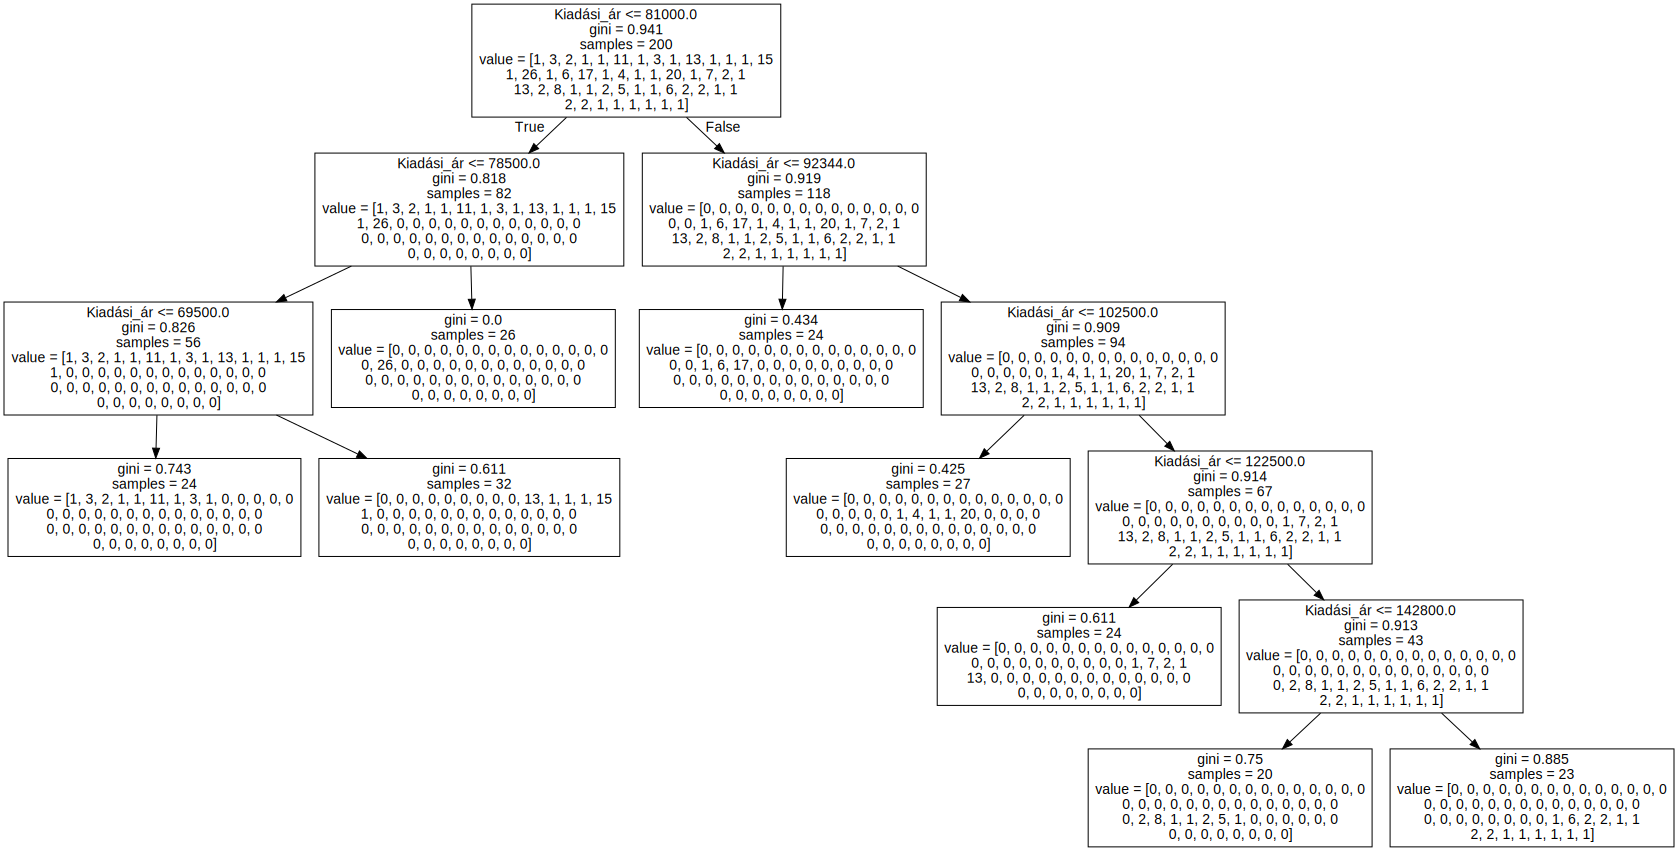

In [ ]:
# döntési fa meta-paramétereinek változtatása:
dt = tree.DecisionTreeClassifier(min_samples_leaf=20, max_depth=6)
dt.fit(df_dontesi_fa_proba, classlabel_proba)
graphviz.Source(tree.export_graphviz(dt, out_file=None, feature_names=df_dontesi_fa_proba.columns))

In [ ]:
#Predikció korábban nem látott példákra
dt.fit(df_dontesi_fa_proba[:150], classlabel_proba[:150]) # első 150 sor (rajtuk tanulunk)
prediction = dt.predict(df_dontesi_fa_proba[150:]) # 150 utáni példák (rajtuk teszteljük a megtanult modellt)
prediction

array([ 80000, 150000, 100000, 150000,  80000, 120000, 100000, 150000,
       120000, 120000,  80000, 100000,  90000,  80000,  75000,  90000,
        70000,  70000, 120000, 150000, 150000, 100000, 120000,  80000,
       120000, 150000,  75000,  90000,  70000, 100000, 150000,  70000,
       120000, 120000,  75000, 120000,  75000,  70000, 150000,  70000,
       100000, 100000, 120000,  80000,  80000,  90000,  70000,  90000,
        70000, 150000])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction, classlabel_proba[150:])

0.4

In [ ]:
for md in range(1,20): # a fa mélyésgét (paraméter) változtatjuk
  dt = tree.DecisionTreeClassifier(min_samples_leaf=10, max_depth=md)
  dt.fit(df_dontesi_fa_proba[:100], classlabel_proba[:100])
  print(accuracy_score(dt.predict(df_dontesi_fa_proba[100:]), classlabel_proba[100:]))

0.18
0.27
0.48
0.58
0.58
0.57
0.58
0.58
0.57
0.57
0.57
0.57
0.57
0.57
0.58
0.58
0.57
0.57
0.58


# **Top5 label encodinggal**
**Bérelt**



In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier() 

df_dontesi_fa_labeltop5_berelt = df_masolat_labeltop5_KESZ_berelt.copy()
classlabel = df_dontesi_fa_labeltop5_berelt.Kiadási_ár

In [ ]:
print(df_masolat_labeltop5_KESZ_berelt.info())

In [ ]:
df_dontesi_fa_labeltop5_berelt.pop('Település')
df_dontesi_fa_labeltop5_berelt.pop('Körzet')
df_dontesi_fa_labeltop5_berelt.pop('Jogi_státusz')
df_dontesi_fa_labeltop5_berelt.pop('Típus')
df_dontesi_fa_labeltop5_berelt.pop('Altípus')
df_dontesi_fa_labeltop5_berelt.pop('Zárószint')
df_dontesi_fa_labeltop5_berelt.pop('Emelet')
df_dontesi_fa_labeltop5_berelt.pop('Tájolás')
df_dontesi_fa_labeltop5_berelt.pop('Kilátás')
df_dontesi_fa_labeltop5_berelt.pop('Fűtés')
df_dontesi_fa_labeltop5_berelt.pop('Telek_méret_mértékegysége')
df_dontesi_fa_labeltop5_berelt.pop('Szobaszám')

In [ ]:
dt.fit(df_dontesi_fa_labeltop5_berelt, classlabel)

DecisionTreeClassifier()

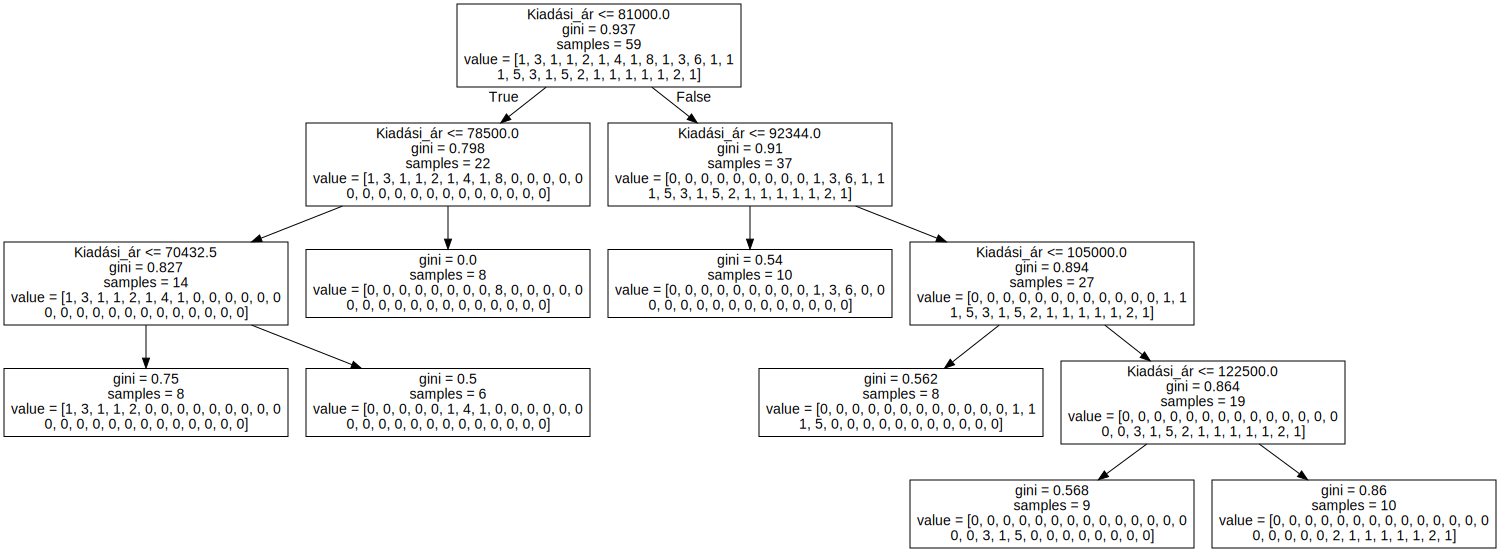

In [ ]:
# döntési fa meta-paramétereinek változtatása:
dt = tree.DecisionTreeClassifier(min_samples_leaf=6, max_depth=4)
dt.fit(df_dontesi_fa_labeltop5_berelt, classlabel)
graphviz.Source(tree.export_graphviz(dt, out_file=None, feature_names=df_dontesi_fa_labeltop5_berelt.columns))

In [ ]:
#Predikció korábban nem látott példákra
dt.fit(df_dontesi_fa_labeltop5_berelt[:35], classlabel[:35]) # első 500 sor (rajtuk tanulunk)
prediction = dt.predict(df_dontesi_fa_labeltop5_berelt[35:]) # 500 utáni példák (rajtuk teszteljük a megtanult modellt)
prediction

array([120000,  75000, 100000, 100000, 100000,  75000,  90000,  80000,
       120000,  80000,  75000, 120000, 120000, 120000, 100000, 120000,
        75000,  90000,  75000,  75000, 120000, 100000,  80000,  90000])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction, classlabel[35:])

0.5

In [ ]:
for md in range(1,8): # a fa mélyésgét (paraméter) változtatjuk
  dt = tree.DecisionTreeClassifier(min_samples_leaf=4, max_depth=md)
  dt.fit(df_dontesi_fa_labeltop5_berelt[:35], classlabel[:35])
  print(accuracy_score(dt.predict(df_dontesi_fa_labeltop5_berelt[35:]), classlabel[35:]))

0.16666666666666666
0.375
0.2916666666666667
0.25
0.3333333333333333
0.2916666666666667
0.25
